##LAB 6 

###Author: Kyle Sprague 
###Date 4/18/2023 

Purpose: The goal of this lab is to measure the permittivity of free space for a capacitor $\epsilon_{0}$. This value can then be used, along with the capacitor area $A$ and plate separation $d$ and capacitance $C$ for a given resistor of resistance $R$, to obtain the dielectric constant $K$ for an unknown material. The dielectric constant obtained can then be compared to known dielectric constant values to determine the identity of the unknown material. 

##Steps of the analysis: 

From the computer we obtain voltage vs. time graphs. By creating models of the voltage function 

$$V(t) = V_0 e^{\frac{-t}{\tau}}$$ where $\tau = RC,$ we can obtain a value for $\tau$ and extract $C$ using $$\frac{\tau}{R} = C$$. After we have a capacitance for the scope and the capacitor, we an then subtract the capacitance associated with the scope and plug the resultant capacitance into the equation 

$$\epsilon_0 = \frac{C d}{A}$$  

We will then have a value for $\epsilon_0$ for a range of resistors that we can use in subsequent work to find K. To find K, we will repeat the process for finding C, then use the equation 

$$C = \frac{KA \epsilon_0}{d},$$ rearranged in the form 

$$K = \frac{d C}{A \epsilon_0},$$ to obtain K. 

##IMPORTANT: Data files have 501 and 510 kohm; most likely 510 is right


Theory behind the lab: 

If we consider a simple RC circuit with one resistor and one capacitor, we know that the relationship between current, resistance, and voltage will be governed by Ohm's law, which states:

$$V = IR$$

We know that current is the movement of charge within a given time frame and is thus described by 

$$I = \frac{dq}{dt}.$$ 

If we substitute this in for I in Ohm's law, we end up with a differential equation of the form 

$$\frac{-V_c}{R}dt = dq.$$ 

If we recall that voltage is charge divided by capacitance $C$, then this becomes 

$$\frac{-q}{RC}dt = dq.$$ Now we can evaluate the integral

$$\int_{0}^{t} -\frac{1}{RC} dt = \int_{q_0}^{q} \frac{dq}{q}$$ 

to obtain 

$$\frac{q(t)}{C} = \frac{q_0}{C} e^{\frac{-t}{RC}}.$$

If we replace the $$\frac{q}{C}$$ terms with voltage and let $$\tau = RC$$, then we have an equation of the form: 

$$V(t) = V_0 e^{\frac{-t}{\tau}}$$. 

This is the equation we will use to create models of our circuit where $V_0$ is the initial voltage which decays over time due to the resistor in the circuit. From our models we can extract $\tau$ and divide by the resistance to extract $C$. After we obtain $C$, we will need to find an associated $\epsilon_0$, the permittivity of free space (or, in modern terms, the electric constant). For this we will bake use of the integral form of Gauss' law, the electric potential equation, and the formula for capacitance. Consider a circular parallel plate capacitor of area $A = \pi r^2$ where r is radius and with a plate separation distance of $d$. 

The electric potential equation takes the form 

$$\Delta V = - \int_{i}^{f} \vec{E} \cdot d\vec{s}$$ 

where $\vec{s}$ is dispacement and E is the electric field. Note that for our case, this will simplify to $E \cdot d$. Recalling that C = \frac{q}{\Delta V}, we substitute our result in for $\Delta V$ to obtain 

$$C = \frac{q}{\vec{E} \cdot D}.$$ 

To find E, we make use of Gauss law, which states 

$$\oint \vec{E} \cdot d\vec{a} = \frac{q_{enc}}{\epsilon_0}$$ 

where $q_{enc}$ is charge enclosed within the area $d\vec{a}$ and $\epsilon_0$ is the permittivity of free space. Since we are working with an electric field that is perpendicular to the area, this integral can be simplified to obtain 

$$ E = \frac{q_enc}{A \epsilon_0}$$< which we substitute into our expression for C and arrive at 

$$C = \frac{A \epsilon_0}{d}$$ 

Now we can rearrange to find $\epsilon_0$, for which we get: 

$$\epsilon_0 = \frac{C d}{A}$$ 

where we obtain C from a model, d is measured using the micrometers on the capacitor, and A is obtained by performing a radius measurment of the capacitor. Note, however, that since C here is actually $C_{capacitor} + C_{scope}$ because these capacitors are in parallel, we will need to obtain the real $epsilon_0$ using a model that enables us to subtract $$C_{scope}$$. From here forward, when referring to the data collected directly from the scope which contains $C_{scope}$ and $C_{capacitor}$, we will refer to this capacitance as $C_{total}$. Our initial $\epsilon_0$ (henceforth, $\epsilon_{0,total}$) we obtain from $C_{total}$ function as a guess in our model, which takes the form: 

$y = \frac{a}{x} + b$ 

where $y = C_{total}$, $a = \epsilon_0 A$, $x = d$, and $b = c_{scope}$. Note that x will be an array of distance values and that for a, we use the mean of $\epsilon{0,total}$ values for each respective distance. After we extract C_scope and $\epsilon_0$ from the model, we can use these values to calculate $K_air$ where 

$K_{air} = \frac{\epsilon_0}{\epsilon_{0,vacuum}}$

For the unknown substance, we insert a thin sheet of a particular width between the capacitor plates. We repeat our modeling process to obtain a $C_total$ value for the filled case. Then, since we have $C_scope$ from the unfilled case, we can subtract $C_scope$ from our new capacitance and obtain $\epsilon_{0, unknown}$ without the use of another model. We then can use 

$$K_{unknown} = \frac{\epsilon_{0, unknown}}{\epsilon_0}$$ 

where, theoretically, our previously obtained $\epsilon_0$ for the unknown case should give us a value quite similar to the value for a vacuum of $\epsilon_{0, vacuum} = 8.85 \times 10^{-12} F m^{-1}$ We can then use this value of $K_{unkown}$ and compare it to dielectric constants of known materials to find the identity of the dielectric substance we use. 







In [1]:
##Installing lmfit 

!pip3 install lmfit  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 6.2 MB/s eta 0:00:00


In [2]:
##Importing relevant libraries 

import glob
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import lmfit as lm
from lmfit import Model 

import scipy  
import scipy.signal as signal 
from scipy import stats 

from google.colab import drive  
drive.mount('/content/drive/')  

Mounted at /content/drive/


In [3]:

def data_aggregator_func(path: str, type_data: str) -> list: 
  ''' 
    Aggregate data into a dictionary by capacitor separation 
  '''  
  '''
  data_dict_updated = {}  
  all_files = glob.glob(path) 
  one_mm_files = [file for file in all_files if "1mm" in file]   
  
  one_mm_data_dict = {"1kohm": None, "2kohm": None, "10kohm": None, "20kohm": None, "51kohm": None, "100kohm": None, "501kohm": None}
  for i in range(len(one_mm_files)):
    #print(one_mm_files[i])
    for j in range(len(one_mm_data_dict)):
      if list(one_mm_data_dict.keys())[j] in one_mm_files[i].split()[-1]: 
        if isinstance(one_mm_data_dict[list(one_mm_data_dict.keys())[j]], pd.DataFrame) == False:   
          print(list(one_mm_data_dict.keys())[j])
          one_mm_data_dict[list(one_mm_data_dict.keys())[j]] = pd.read_csv(one_mm_files[i])    
  ''' 
  all_files = glob.glob(path)

  if type_data == "unfilled":
    one_mm_files = [file for file in all_files if "1mm" in file]  
    two_mm_files = [file for file in all_files if "02mm" in file]
    four_mm_files = [file for file in all_files if "04mm" in file] 
    six_mm_files = [file for file in all_files if "06mm" in file]  
    eight_mm_files = [file for file in all_files if "08mm" in file]   
    
    composite = [one_mm_files, two_mm_files, four_mm_files, six_mm_files, eight_mm_files] 

    one_mm_data_dict = {"1kohm": None, "2kohm": None, "10kohm": None, "20kohm": None, "51kohm": None, "100kohm": None, "510kohm": None} 
    two_mm_data_dict = {"1kohm": None, "2kohm": None, "10kohm": None, "20kohm": None, "51kohm": None, "100kohm": None, "510kohm": None} 
    four_mm_data_dict = {"1kohm": None, "2kohm": None, "10kohm": None, "20kohm": None, "51kohm": None, "100kohm": None, "510kohm": None} 
    six_mm_data_dict = {"1kohm": None, "2kohm": None, "10kohm": None, "20kohm": None, "51kohm": None, "100kohm": None, "510kohm": None} 
    eight_mm_data_dict = {"1kohm": None, "2kohm": None, "10kohm": None, "20kohm": None, "51kohm": None, "100kohm": None, "510kohm": None}

    for i in range(len(one_mm_files)):
    #print(one_mm_files[i])
      for j in range(len(one_mm_data_dict)):
        if list(one_mm_data_dict.keys())[j] in one_mm_files[i].split()[-1]: 
          if isinstance(one_mm_data_dict[list(one_mm_data_dict.keys())[j]], pd.DataFrame) == False:   
            #print(list(one_mm_data_dict.keys())[j])
            one_mm_data_dict[list(one_mm_data_dict.keys())[j]] = pd.read_csv(one_mm_files[i])   

    for i in range(len(two_mm_files)):
    #print(one_mm_files[i])
      for j in range(len(two_mm_data_dict)):
        if list(two_mm_data_dict.keys())[j] in two_mm_files[i].split()[-1]: 
          if isinstance(two_mm_data_dict[list(two_mm_data_dict.keys())[j]], pd.DataFrame) == False:   
            #print(list(two_mm_data_dict.keys())[j])
            two_mm_data_dict[list(two_mm_data_dict.keys())[j]] = pd.read_csv(two_mm_files[i])    

    for i in range(len(four_mm_files)):
    #print(one_mm_files[i])
      for j in range(len(four_mm_data_dict)):
        if list(four_mm_data_dict.keys())[j] in four_mm_files[i].split()[-1]: 
          if isinstance(four_mm_data_dict[list(four_mm_data_dict.keys())[j]], pd.DataFrame) == False:   
            #print(list(four_mm_data_dict.keys())[j])
            four_mm_data_dict[list(four_mm_data_dict.keys())[j]] = pd.read_csv(four_mm_files[i])  

    for i in range(len(six_mm_files)):
    #print(one_mm_files[i])
      for j in range(len(six_mm_data_dict)):
        if list(six_mm_data_dict.keys())[j] in six_mm_files[i].split()[-1]: 
          if isinstance(six_mm_data_dict[list(six_mm_data_dict.keys())[j]], pd.DataFrame) == False:   
            #print(list(six_mm_data_dict.keys())[j])
            six_mm_data_dict[list(six_mm_data_dict.keys())[j]] = pd.read_csv(six_mm_files[i])  

    for i in range(len(eight_mm_files)):
    #print(one_mm_files[i])
      for j in range(len(eight_mm_data_dict)):
        if list(eight_mm_data_dict.keys())[j] in eight_mm_files[i].split()[-1]: 
          if isinstance(eight_mm_data_dict[list(eight_mm_data_dict.keys())[j]], pd.DataFrame) == False:   
            #print(list(eight_mm_data_dict.keys())[j])
            eight_mm_data_dict[list(eight_mm_data_dict.keys())[j]] = pd.read_csv(eight_mm_files[i])  
    
    full_data_dict_list = [one_mm_data_dict, two_mm_data_dict, four_mm_data_dict, six_mm_data_dict, eight_mm_data_dict] 
    return full_data_dict_list 

  if type_data == "filled": 
    #print(all_files)
    single_sheet_data = [file for file in all_files if "sheet1" in file and "sheet2" not in file]  
    double_sheet_data = [file for file in all_files if "sheet2" in file and "sheet3" not in file]  
    triple_sheet_data = [file for file in all_files if "sheet3" in file and "sheet4" not in file]   
    #triple_files = [file for file in all_files if "sheet3" in file and "sheet4" not in file] 
    quadruple_sheet_data = [file for file in all_files if "sheet4" in file]    
    print(quadruple_sheet_data)

    single_sheet_data_dict = {"1kohm": None, "2kohm": None, "10kohm": None, "20kohm": None, "51kohm": None, "100kohm": None, "510kohm": None} 
    double_sheet_data_dict = {"1kohm": None, "2kohm": None, "10kohm": None, "20kohm": None, "51kohm": None, "100kohm": None, "510kohm": None} 
    triple_sheet_data_dict = {"1kohm": None, "2kohm": None, "10kohm": None, "20kohm": None, "51kohm": None, "100kohm": None, "510kohm": None} 
    quadruple_sheet_data_dict = {"1kohm": None, "2kohm": None, "10kohm": None, "20kohm": None, "51kohm": None, "100kohm": None, "510kohm": None} 

    for i in range(len(single_sheet_data)):
      for j in range(len(single_sheet_data_dict)):
        if list(single_sheet_data_dict.keys())[j] in single_sheet_data[i].split()[-1]: 
          if isinstance(single_sheet_data_dict[list(single_sheet_data_dict.keys())[j]], pd.DataFrame) == False:   
            #print(list(eight_mm_data_dict.keys())[j])
            single_sheet_data_dict[list(single_sheet_data_dict.keys())[j]] = pd.read_csv(single_sheet_data[i])  

    for i in range(len(double_sheet_data)):
      for j in range(len(double_sheet_data_dict)):
        if list(double_sheet_data_dict.keys())[j] in double_sheet_data[i].split()[-1]: 
          if isinstance(double_sheet_data_dict[list(double_sheet_data_dict.keys())[j]], pd.DataFrame) == False:   
            #print(list(eight_mm_data_dict.keys())[j])
            double_sheet_data_dict[list(double_sheet_data_dict.keys())[j]] = pd.read_csv(double_sheet_data[i])  

    for i in range(len(triple_sheet_data)):
      for j in range(len(triple_sheet_data_dict)):
        if list(triple_sheet_data_dict.keys())[j] in triple_sheet_data[i].split()[-1]: 
          if isinstance(triple_sheet_data_dict[list(triple_sheet_data_dict.keys())[j]], pd.DataFrame) == False:   
            #print(list(eight_mm_data_dict.keys())[j])
            triple_sheet_data_dict[list(triple_sheet_data_dict.keys())[j]] = pd.read_csv(triple_sheet_data[i])  

    for i in range(len(quadruple_sheet_data)):
      for j in range(len(quadruple_sheet_data_dict)):
        if list(quadruple_sheet_data_dict.keys())[j] in quadruple_sheet_data[i].split()[-1]: 
          if isinstance(quadruple_sheet_data_dict[list(quadruple_sheet_data_dict.keys())[j]], pd.DataFrame) == False:   
            #print(list(eight_mm_data_dict.keys())[j])
            quadruple_sheet_data_dict[list(quadruple_sheet_data_dict.keys())[j]] = pd.read_csv(quadruple_sheet_data[i])  

    return [single_sheet_data_dict, double_sheet_data_dict, triple_sheet_data_dict, quadruple_sheet_data_dict]

unfilled_path = "/content/drive/MyDrive/Sprague | 231/L_6/Capacitor_Data/*csv"  
filled_path = "/content/drive/MyDrive/Sprague | 231/L_6/Filled_Capacitor_Data/*csv" 

### THE ACTUAL DATA WE WILL USE FOR THE REST OF THIS #####

capacitor_unfilled_dict_list = data_aggregator_func(unfilled_path, "unfilled") #list of 5 dicts for distances 1mm 2mm 4mm 6mm 8mm  
#each dictionary has 7 entries, one dataframe value for each resistor key  

capacitor_filled_dict_list = data_aggregator_func(filled_path, "filled") #list of 4 dicts for one sheet, 2 sheets, three sheets, and 4 sheets 
#cases; each dictionary has an key for a resistor and an associated data frame for that key 


['/content/drive/MyDrive/Sprague | 231/L_6/Filled_Capacitor_Data/KA_dielectric_sheet1_sheet2_sheet3_sheet4_51kohm.csv', '/content/drive/MyDrive/Sprague | 231/L_6/Filled_Capacitor_Data/KA_dielectric_sheet1_sheet2_sheet3_sheet4_10kohm.csv', '/content/drive/MyDrive/Sprague | 231/L_6/Filled_Capacitor_Data/KA_dielectric_sheet1_sheet2_sheet3_sheet4_100kohm.csv', '/content/drive/MyDrive/Sprague | 231/L_6/Filled_Capacitor_Data/KA_dielectric_sheet1_sheet2_sheet3_sheet4_2kohm.csv', '/content/drive/MyDrive/Sprague | 231/L_6/Filled_Capacitor_Data/KA_dielectric_sheet1_sheet2_sheet3_sheet4_20kohm.csv', '/content/drive/MyDrive/Sprague | 231/L_6/Filled_Capacitor_Data/KA_dielectric_sheet1_sheet2_sheet3_sheet4_510kohm.csv', '/content/drive/MyDrive/Sprague | 231/L_6/Filled_Capacitor_Data/KA_dielectric_sheet1_sheet2_sheet3_sheet4_1kohm.csv']


0
1
2


<ipython-input-4-0ae4a30aa624>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


3
4


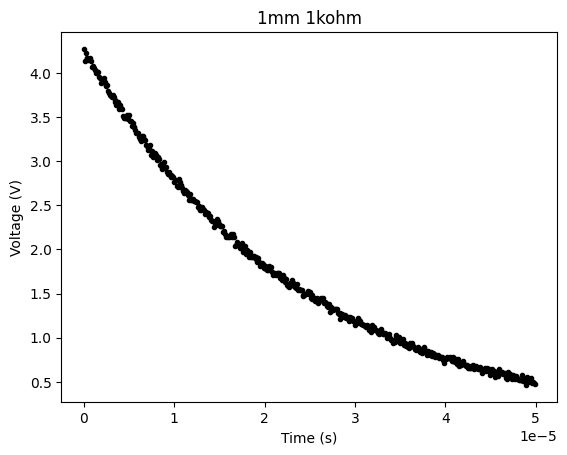

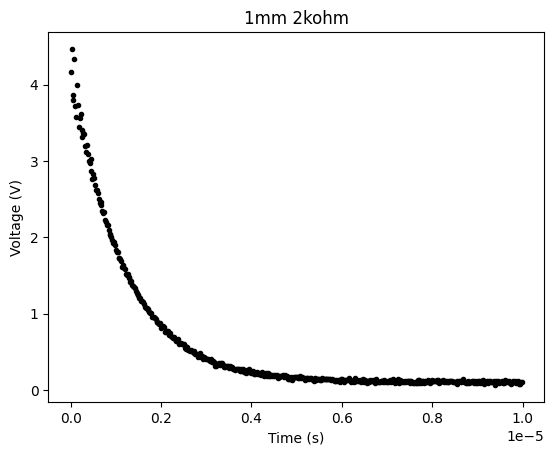

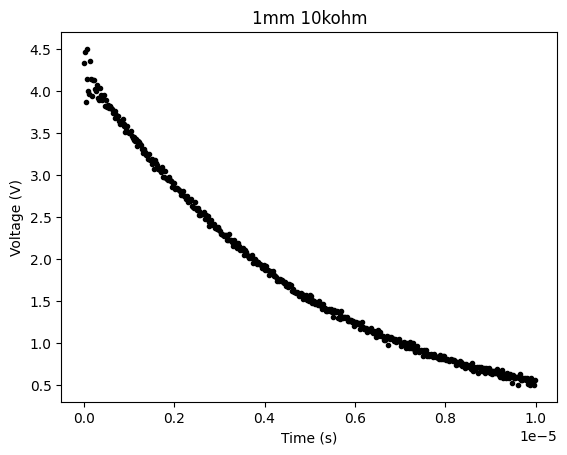

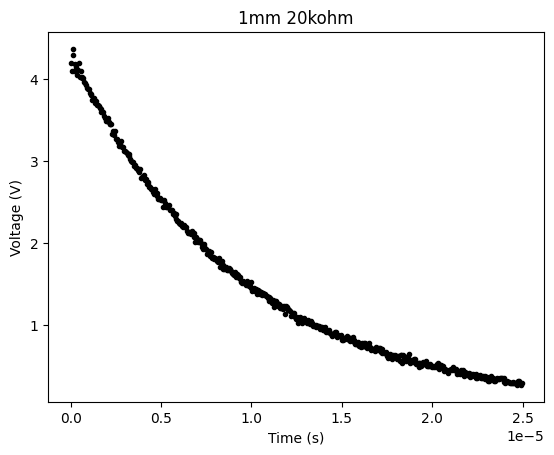

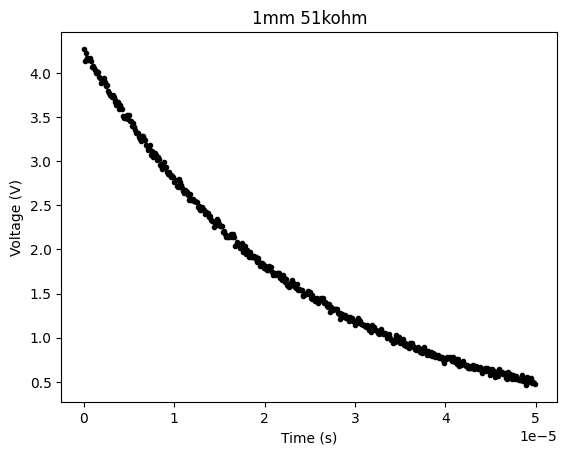

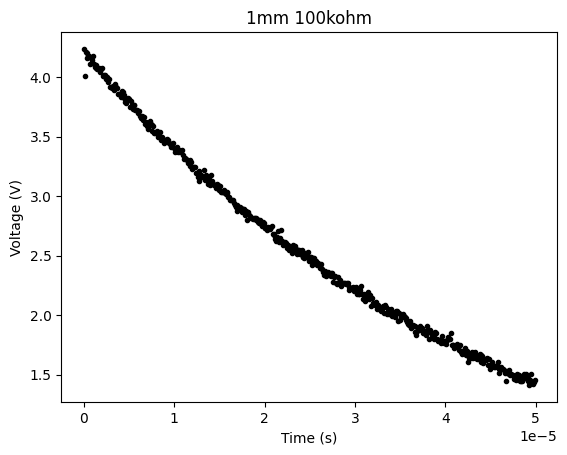

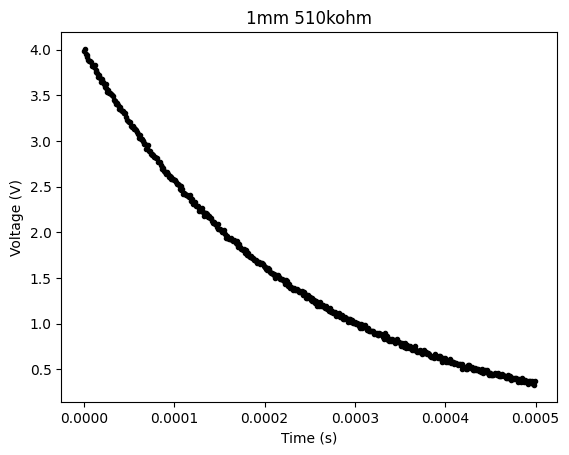

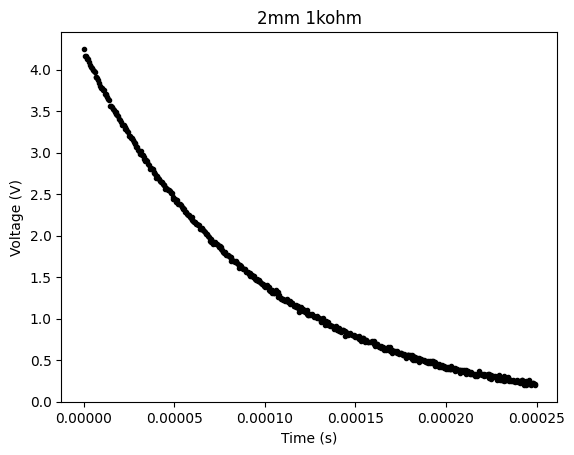

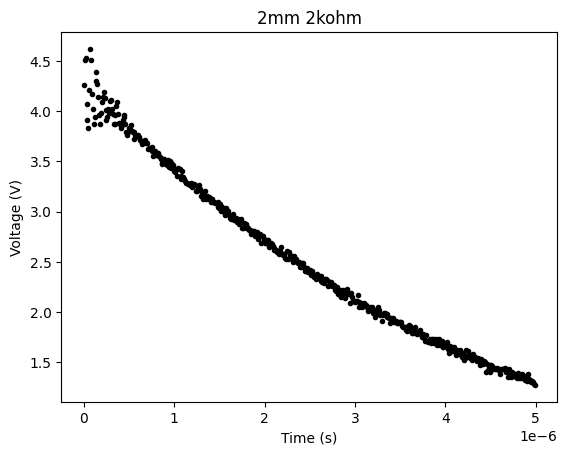

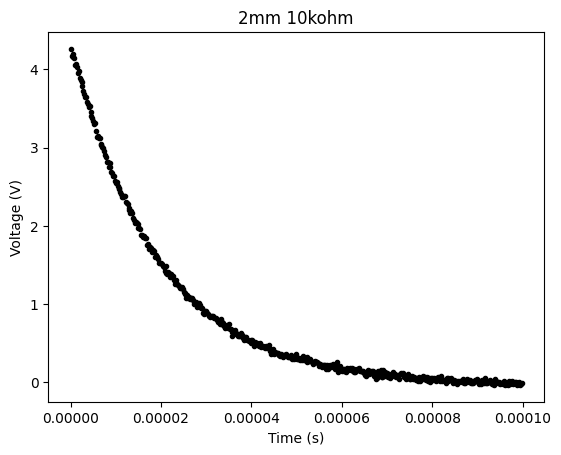

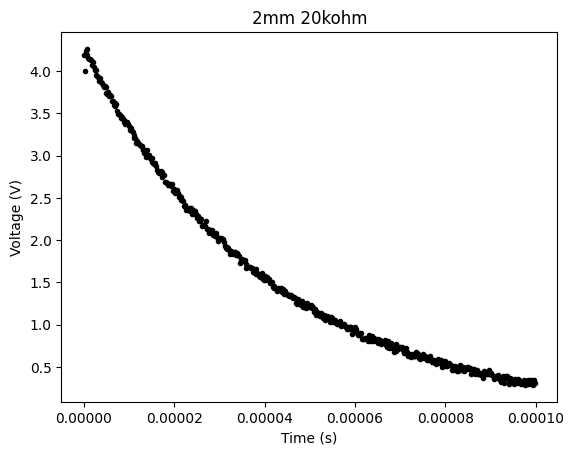

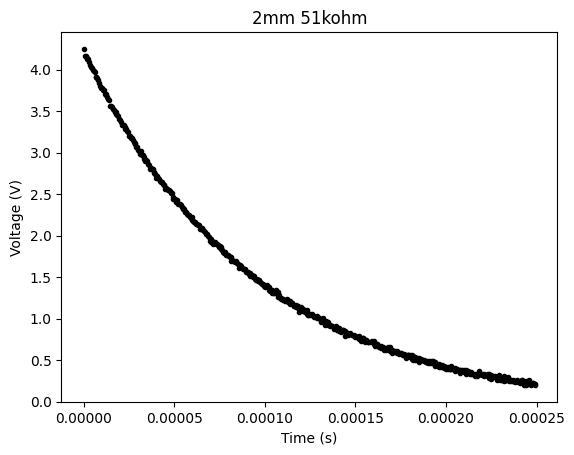

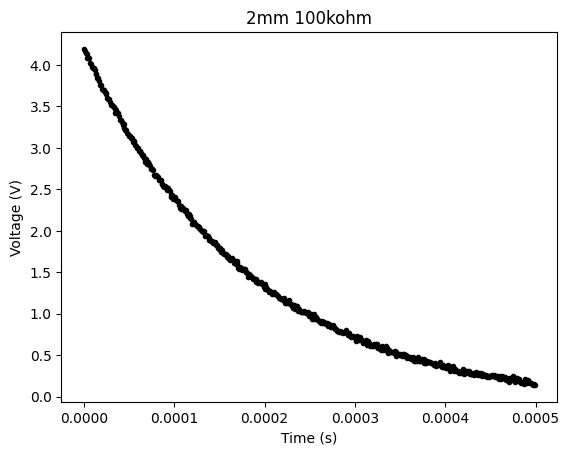

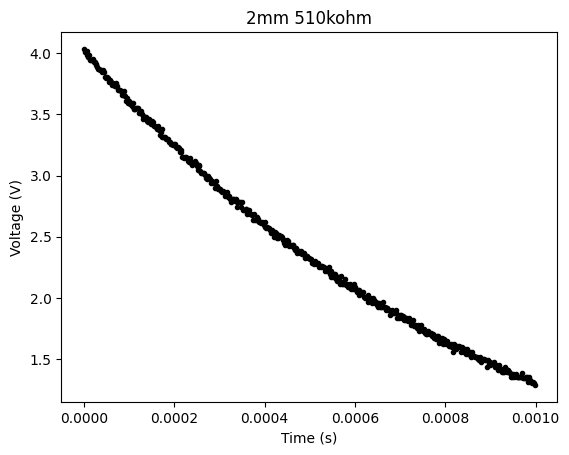

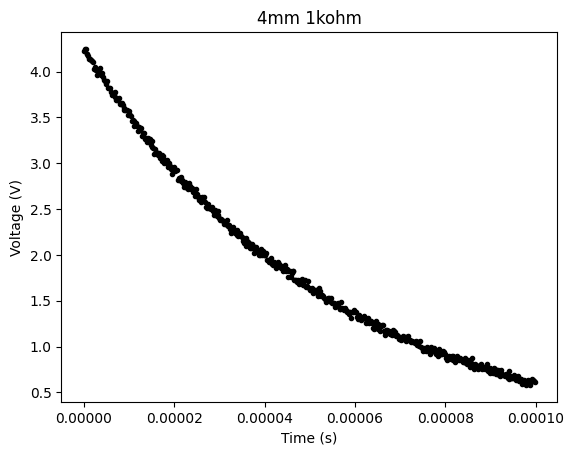

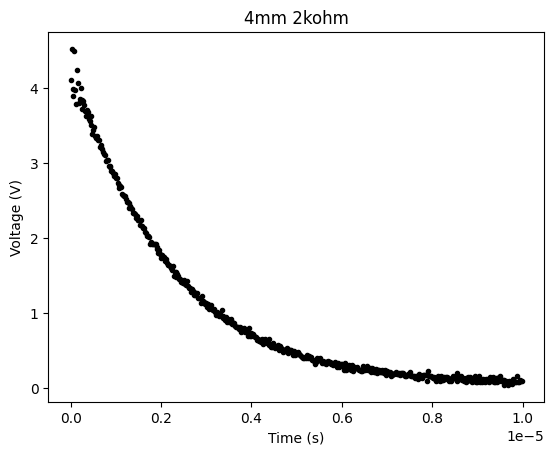

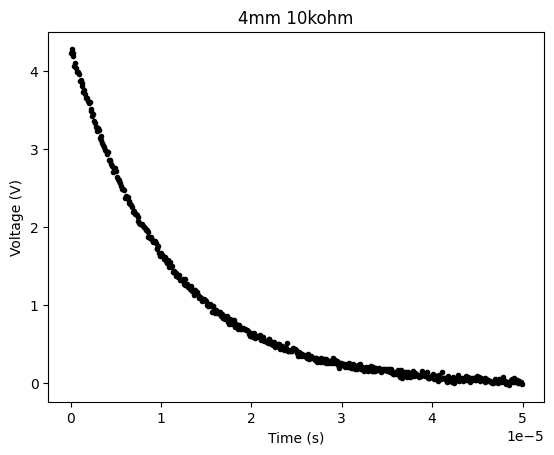

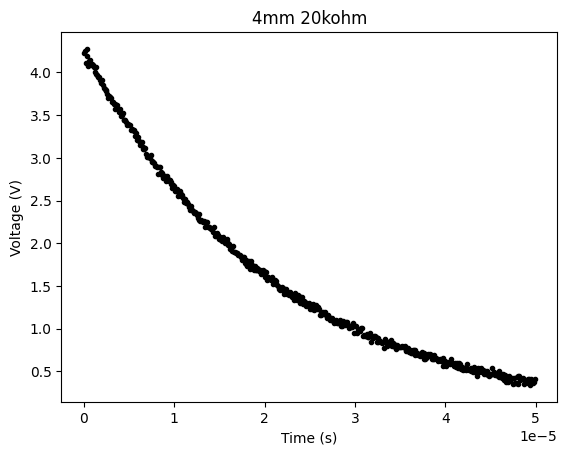

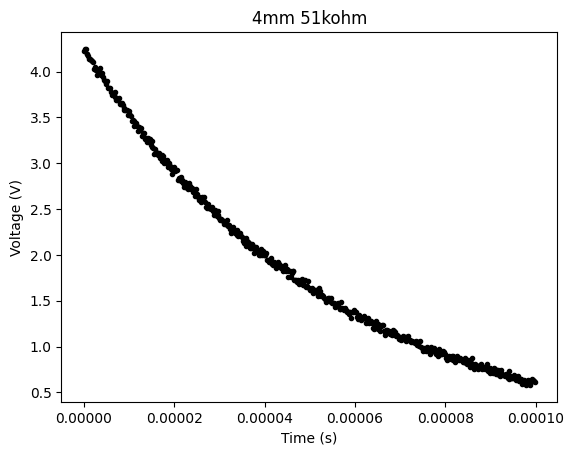

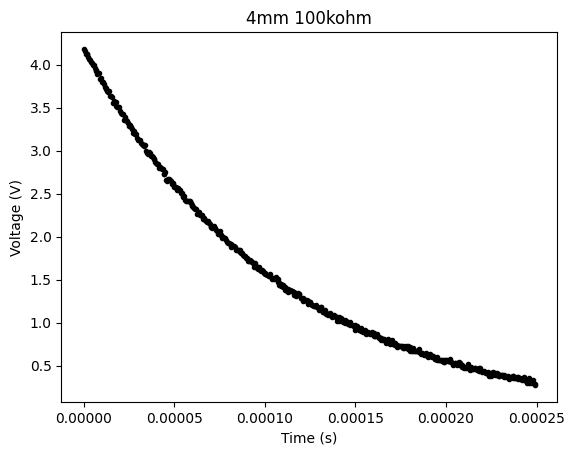

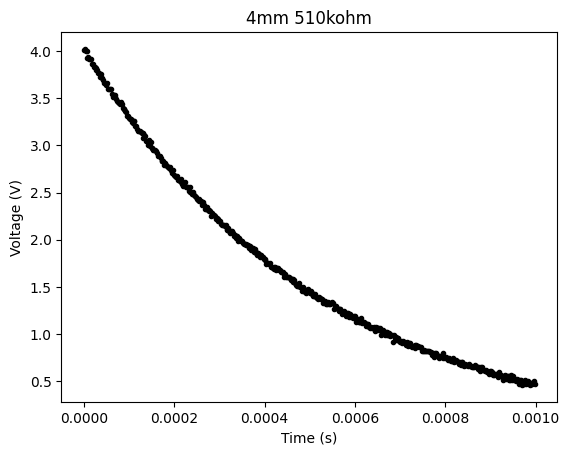

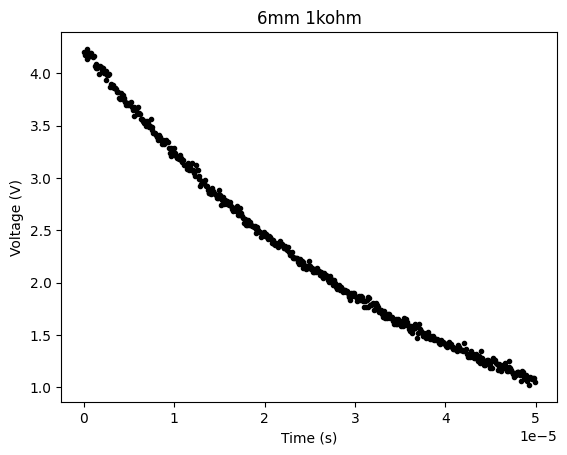

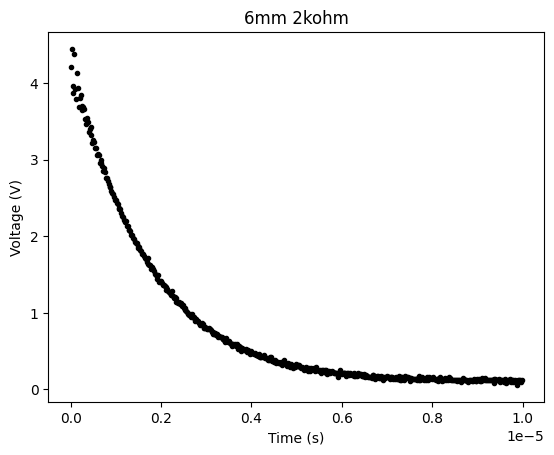

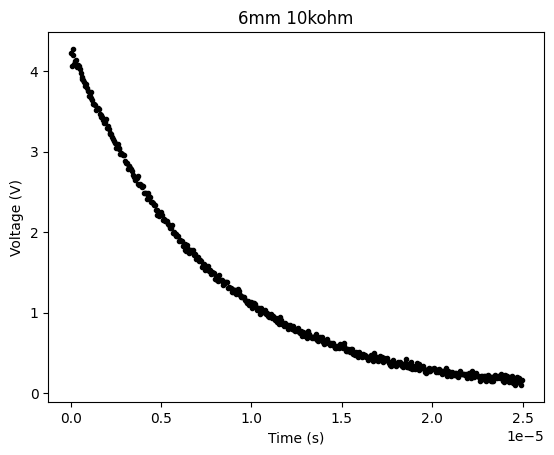

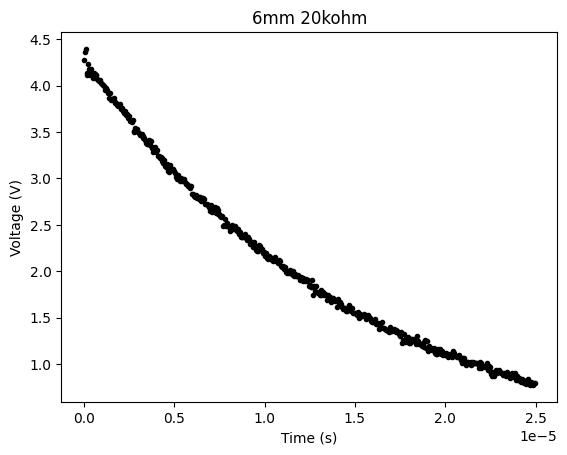

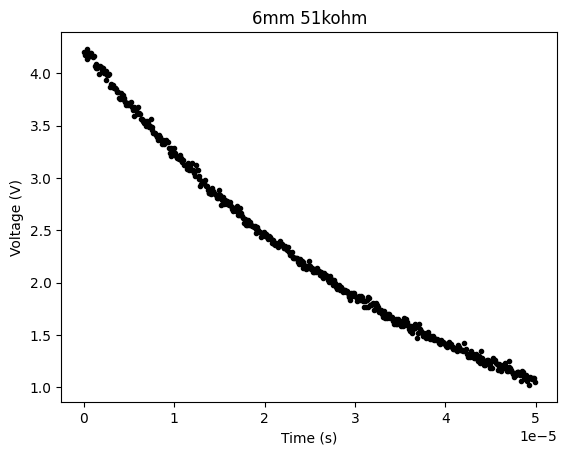

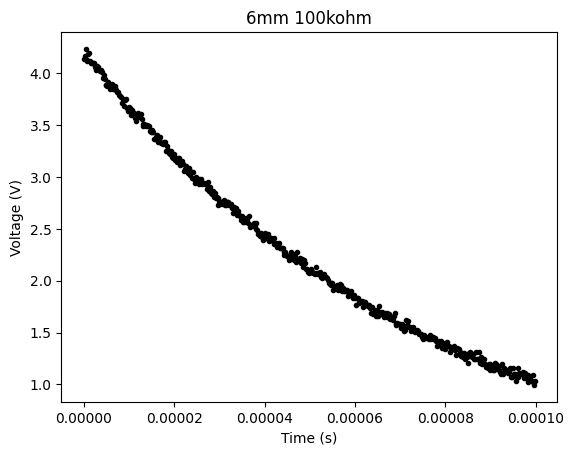

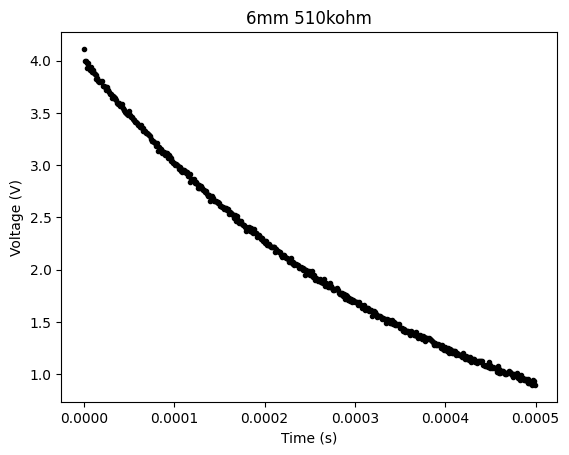

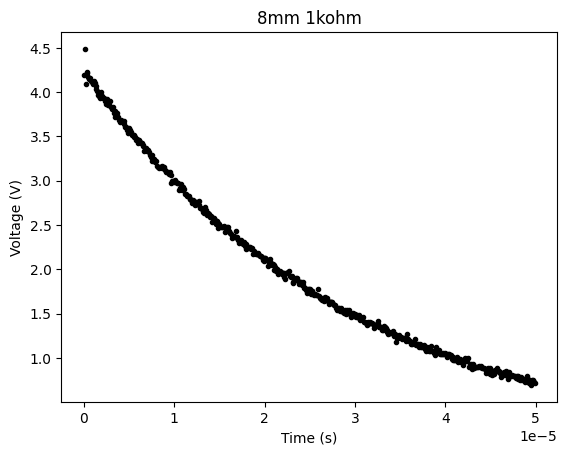

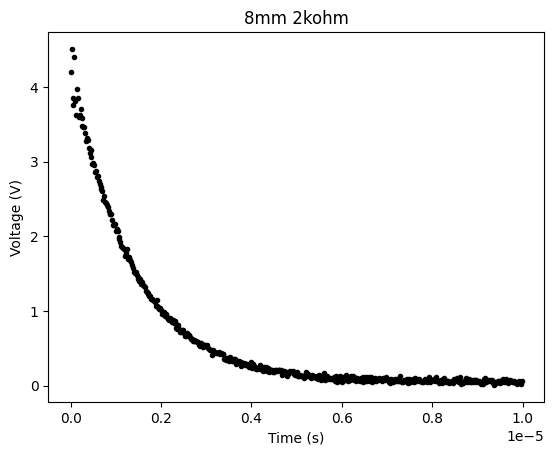

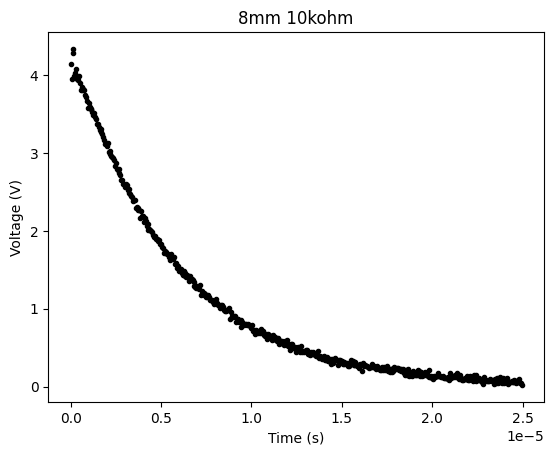

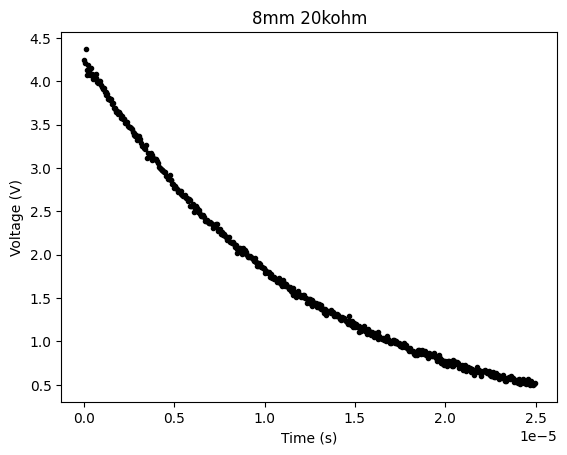

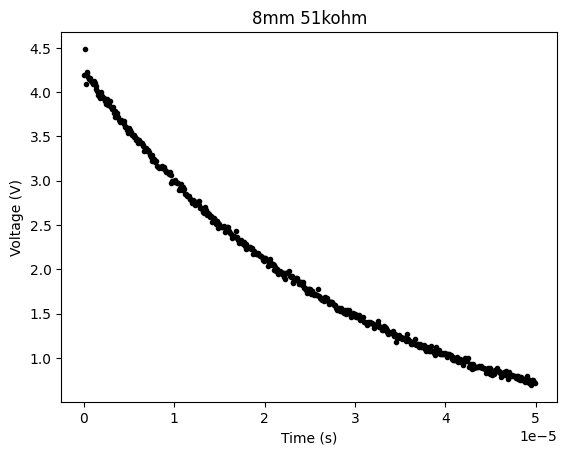

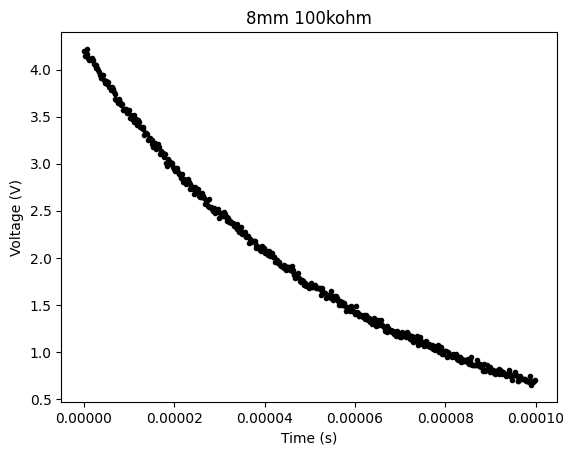

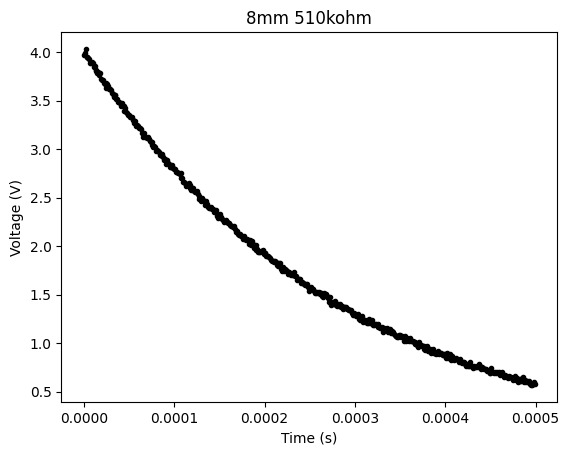

In [4]:
def quick_plotter(dict_list: list, type_list: str):  
  if type_list == "unfilled": 
    distances = ["1mm", "2mm", "4mm", "6mm", "8mm"]
    for i in range(len(dict_list)): 
      print(i)
      for key, value in dict_list[i].items(): 
        plt.figure()
        plt.plot(value["Time(s)"], value["Ch 1  (V)"], ".", color = "black") 
        plt.xlabel("Time (s)") 
        plt.ylabel("Voltage (V)")
        plt.title(distances[i] + " " + key) 
  else: 
    sheet_amounts = ["1 sheet", "2 sheets", "3 sheets", "4 sheets"]
    for  j in range(len(dict_list)): 
      #print(j) 
      #print(dict_list[j])
      for key, value in dict_list[j].items(): 
        plt.figure() 
        #print(key) 
        #print(value)
        plt.plot(value["Time(s)"], value["Ch 1  (V)"], ".", color = "black") 
        plt.xlabel("Time (s)") 
        plt.ylabel("Voltage (V)") 
        plt.title(sheet_amounts[j] + " " + key)     
        
quick_plotter(capacitor_unfilled_dict_list, "unfilled") 

##Truncation notes for unfilled plots: 

- 1mm 2kohm: truncate after 0.05 * 10^-5
- 1mm 10 kohm: truncate after 0.05 *10^-5
- 1mm 20 kohm: truncate after 0.05 *10^-5
- 1mm 100 kohm: truncate after 0.05 *10^-5 

- 2 mm 2kohm: truncate after 0.5 *10^-5 
- 2 mm 20kohm: truncate after 0.000010 

- 4mm 2kohm: truncate after 0.05 *10^-5 

- 6mm 2kohm: truncate after 0.05 *10^-5  
- 6 mm 10kohm: truncate after 0.05 *10^-5  
-6 mm 20 kohm truncate after 0.05 *10^-5 

- 8mm 1kohm: truncate after 0.05 *10^-5  
- 8mm 2kohm: truncate after 0.05 *10^-5 
- 8 mm 10 kohm truncate after 0.05 *10^-5  
- 8mm 20 truncate after 0.05 *10^-5 








In [5]:
def get_voltage_intercept_est(dict_list): 
  "Function to return the voltage at the lowest time value. Repeats for all dataframes"

  full_intercept_list = []
  for i in range(len(dict_list)): 
    intercept_sublist = [] 
    for key, value in dict_list[i].items():
      intercept_sublist.append(value["Ch 1  (V)"][0]) 
    full_intercept_list.append(intercept_sublist)

  return full_intercept_list
    
v_naught_val_unfilled_estimates = get_voltage_intercept_est(capacitor_unfilled_dict_list)
v_naught_val_filled_estimates = get_voltage_intercept_est(capacitor_filled_dict_list)

In [6]:
def truncation_func_unfilled(data_frame_dicts: list,  elements_to_update: list, type_data: str):  
  
  if type_data == "unfilled": 

    #recall keys are '1kohm', '2kohm', '10kohm', '20kohm', '51kohm', '100kohm', '510kohm'

    data_frame_dict_list = data_frame_dicts.copy() 
    trunc_end_1 = 0.7*10**-5

    for i in range(len(elements_to_update)):

      if elements_to_update[i][0] == 1: 
        #this means the element to update is within the 1mm dict 
        #we need to access element 0 of the dict list
        starter_dict = data_frame_dict_list[0] 
        resistor = str(elements_to_update[i][1])
        
        for key, value in starter_dict.items():  
          #print(value)
          if resistor in key:  
            if key == "2kohm": 
              new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index() 
              totally_truncated = new_df[new_df["Time(s)"] < trunc_end_1].reset_index() 
              starter_dict[key] = totally_truncated

            else:
              new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index()
              starter_dict[key] = new_df 

        data_frame_dict_list[0] = starter_dict 
        
      elif elements_to_update[i][0] == 2: 

        #this means the element to update is within the 2mm dict 
        #we need to access element 1 of the dict list
        starter_dict = data_frame_dict_list[1] 
        resistor = str(elements_to_update[i][1])
        
        for key, value in starter_dict.items():  
          #print(value)
          if resistor in key:  
            new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index()
            starter_dict[key] = new_df 

        data_frame_dict_list[1] = starter_dict 

      elif elements_to_update[i][0] == 4: 

        #this means the element to update is within the 4mm dict 
        #we need to access element 2 of the dict list
        starter_dict = data_frame_dict_list[2] 
        resistor = str(elements_to_update[i][1])
        
        for key, value in starter_dict.items():  
          #print(value) 
          if resistor in key:   

            new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index()
            starter_dict[key] = new_df 

        data_frame_dict_list[2] = starter_dict 

      elif elements_to_update[i][0] == 6:   
        #this means the element to update is within the 6mm dict 
        #we need to access element 3 of the dict list

        starter_dict = data_frame_dict_list[3] 
        resistor = str(elements_to_update[i][1])
        
        for key, value in starter_dict.items():  
          #print(value)
          if resistor in key:  
           if key == "2kohm": 
              new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index() 
              totally_truncated = new_df[new_df["Time(s)"] < trunc_end_1].reset_index() 
              starter_dict[key] = totally_truncated 
           else: 
              new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index()
              starter_dict[key] = new_df 

        data_frame_dict_list[3] = starter_dict 

      elif elements_to_update[i][0] == 8:  
        #this means the element to update is within the 8mm dict 
        #we need to access element 4 of the dict list

        starter_dict = data_frame_dict_list[4] 
        resistor = str(elements_to_update[i][1])
        
        for key, value in starter_dict.items():  
          #print(value)
          if resistor in key:  
            if key == "2kohm": 
              new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index() 
              totally_truncated = new_df[new_df["Time(s)"] < trunc_end_1].reset_index() 
              starter_dict[key] = totally_truncated 
            else: 
              new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index()
              starter_dict[key] = new_df 
              new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index()
              starter_dict[key] = new_df 

        data_frame_dict_list[4] = starter_dict  

    return data_frame_dict_list  

  elif type_data == "replace_all": 

    df_dict_list = data_frame_dicts.copy()

    for i in range(len(data_frame_dicts)): 
      for key, value in data_frame_dicts[i].items(): 
        if (i != 2 and key != "2kohm") and (i != 1 and key != "10kohm"):
          new_df = value[value["Time(s)"] > 1*10**-5].reset_index()
          df_dict_list[i][key] = new_df 
          if len(new_df.index) == 0: 
            print(i, key)
        elif (i == 2 and key == "2kohm") or (i == 1 and key == "10kohm"): 
          print("hi")
          new_df = value[value["Time(s)"] > 0.05*10**-6].reset_index()
          df_dict_list[i][key] = new_df 
          print(new_df)
    
    for i in range(len(df_dict_list)): 
      print(len(df_dict_list[i])) 

    return df_dict_list

    
truncation_points_unfilled = [(1, 2, 0.05*(10**-5)), (1, 10, 0.175*(10**-5)), (1, 20, 0.1*(10**-5)), 
                              (1, 51, 0.1*(10**-5)), 
                              (1, 100, 0.1*(10**-5)), (2, 2, 0.5*(10**-6)), (2, 20, 0.000010), 
                              (4, 2, 0.05*(10**-5)), (6, 2, 0.05*(10**-5)), (6, 10, 0.05*(10**-5)),
                              (6, 20, 0.05*(10**-5)), (8, 1, 0.05*(10**-5)), (8, 2, 0.05*(10**-5)), 
                              (8, 10, 0.05*(10**-5)), (8, 20, 0.05*(10**-5))] 

truncated_capacitor_unfilled_dict_list = truncation_func_unfilled(capacitor_unfilled_dict_list, truncation_points_unfilled, "unfilled")  
#truncated_capacitor_unfilled_same_val = truncation_func_unfilled(capacitor_unfilled_dict_list, truncation_points_unfilled, "replace_all")  


In [7]:
#quick_plotter(truncated_capacitor_unfilled_dict_list, "unfilled") 
#quick_plotter(capacitor_filled_dict_list, "filled")  


##Truncation notes: 

- For 1 sheet, 2kohm, crop at 0.05*10^-5 
- For 2 sheets 2 kohm, crop at 0.05 *10^-5 
- For 3 sheets, 2 kohm,  crop at 0.05 * 10^-5 
- For 4 sheets, 2 kohm,  crop  at 0.5 * 10^-6 



In [8]:



def truncation_func_filled(data_frame_dicts: list, elements_to_update: list):  
  
  data_frame_dict_list = data_frame_dicts.copy()
  
  for i in range(len(elements_to_update)): 

    if elements_to_update[i][0] == 1: 

        starter_dict = data_frame_dict_list[0] 
        resistor = str(elements_to_update[i][1])
        
        for key, value in starter_dict.items():  
          #print(value)
          if resistor in key:  
            new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index()
            starter_dict[key] = new_df 

        data_frame_dict_list[0] = starter_dict 

    elif elements_to_update[i][0] == 2:
        
        starter_dict = data_frame_dict_list[1] 
        resistor = str(elements_to_update[i][1])
        
        for key, value in starter_dict.items():  
          #print(value)
          if resistor in key:  
            new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index()
            starter_dict[key] = new_df 

        data_frame_dict_list[1] = starter_dict 

    elif elements_to_update[i][0] == 3:
      
        starter_dict = data_frame_dict_list[2] 
        resistor = str(elements_to_update[i][1])
        
        for key, value in starter_dict.items():  
          #print(value)
          if resistor in key:  
            new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index()
            starter_dict[key] = new_df 

        data_frame_dict_list[2] = starter_dict 

    elif elements_to_update[i][0] == 4: 
      
        starter_dict = data_frame_dict_list[3] 
        resistor = str(elements_to_update[i][1])
        
        for key, value in starter_dict.items():  
          #print(value)
          if resistor in key:  
            new_df = value[value["Time(s)"] > elements_to_update[i][2]].reset_index()
            starter_dict[key] = new_df 

        data_frame_dict_list[3] = starter_dict   
    
    return data_frame_dict_list

filled_model_updates = [(1, 2, 0.05*10**(-5)), (2, 2, 0.05*10**(-5)), (3, 2, 0.05*10**(-6)), (4, 2, 0.5*10**(-6))] 
truncated_capacitor_filled_dict_list =  truncation_func_filled(capacitor_filled_dict_list, filled_model_updates)

In [9]:
#print(truncated_capacitor_filled_dict_list)
#quick_plotter(truncated_capacitor_filled_dict_list, "filled")





#NOTE: FOCUS FOR NEXT FEW CELLS IS UNFILLED 

##Now we are ready to create models to model our unfilled data

[[Model]]
    Model(voltage_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 500
    # variables        = 2
    chi-square         = 0.34410014
    reduced chi-square = 6.9096e-04
    Akaike info crit   = -3636.71533
    Bayesian info crit = -3628.28611
    R-squared          = 0.99937931
[[Variables]]
    v_0:  4.27173928 +/- 0.00321914 (0.08%) (init = 4.270812)
    tau:  2.3490e-05 +/- 4.8438e-08 (0.21%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(v_0, tau) = -0.6570
[[Model]]
    Model(voltage_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 78
    # data points      = 324
    # variables        = 2
    chi-square         = 1.36374141
    reduced chi-square = 0.00423522
    Akaike info crit   = -1768.44575
    Bayesian info crit = -1760.88426
    R-squared          = 0.98970963
[[Variables]]
    v_0:  4.16899710 +/- 0.02042922 (0.49%) (init = 4.168)
    tau

<ipython-input-10-d3107851d478>:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


[[Model]]
    Model(voltage_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 77
    # data points      = 489
    # variables        = 2
    chi-square         = 0.33782198
    reduced chi-square = 6.9368e-04
    Akaike info crit   = -3554.74576
    Bayesian info crit = -3546.36103
    R-squared          = 0.99923310
[[Variables]]
    v_0:  4.28120940 +/- 0.00324144 (0.08%) (init = 4.282063)
    tau:  1.4880e-05 +/- 4.3940e-08 (0.30%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(v_0, tau) = -0.7089
[[Model]]
    Model(voltage_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 500
    # variables        = 2
    chi-square         = 0.55528100
    reduced chi-square = 0.00111502
    Akaike info crit   = -3397.44454
    Bayesian info crit = -3389.01532
    R-squared          = 0.99864546
[[Variables]]
    v_0:  4.20868351 +/- 0.00367675 (0.09%) (init = 4.208)
    tau

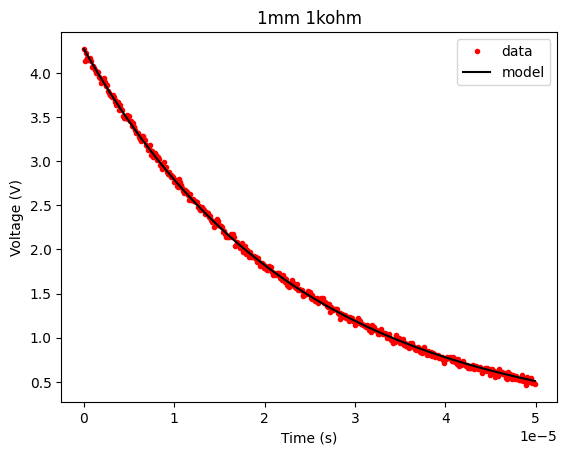

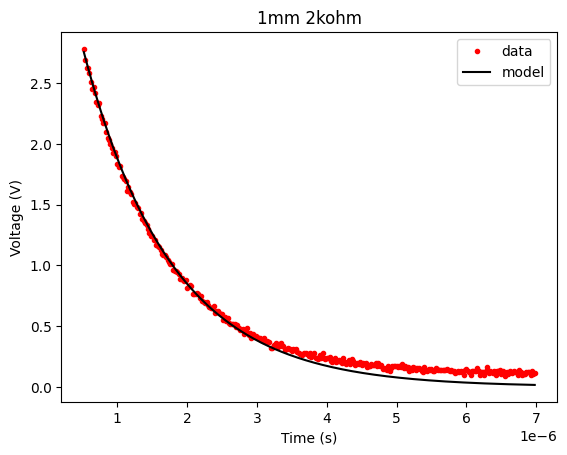

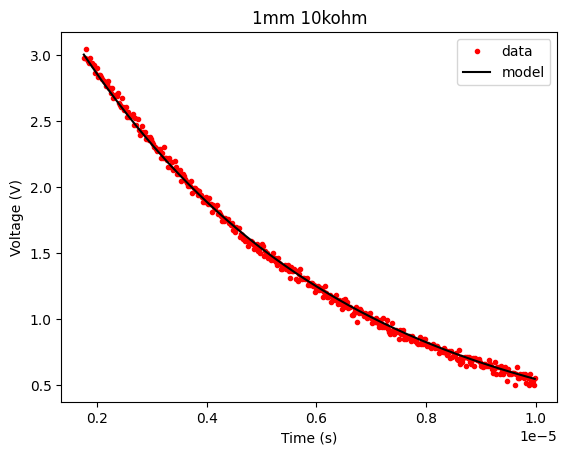

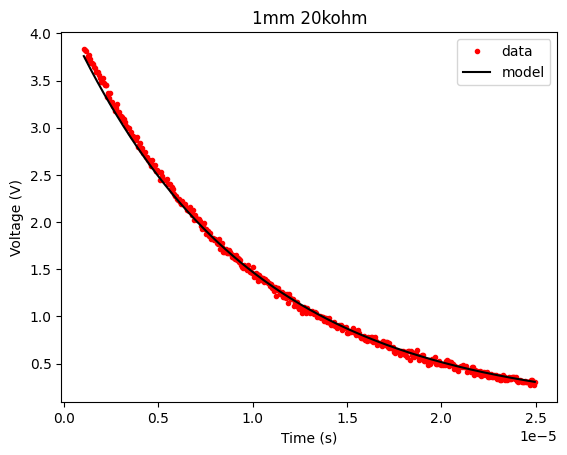

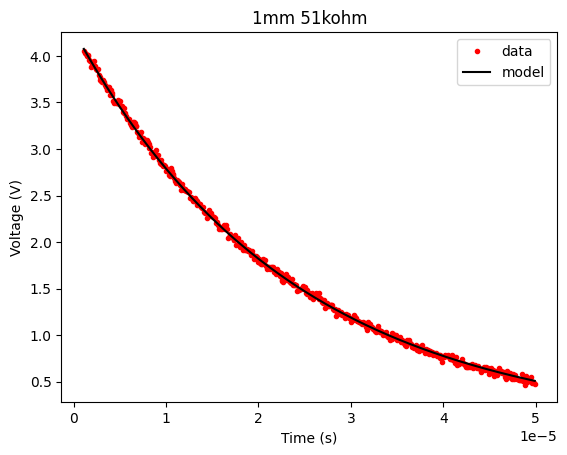

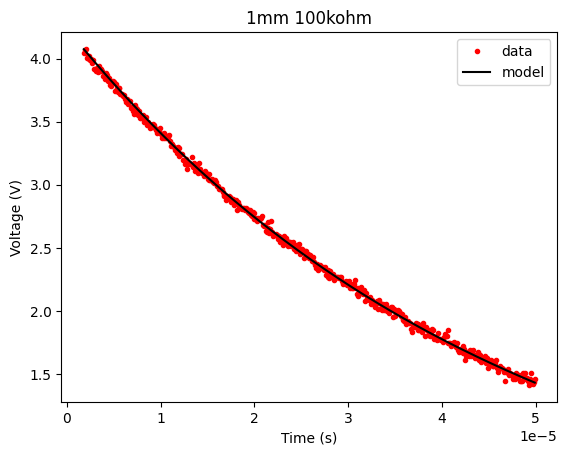

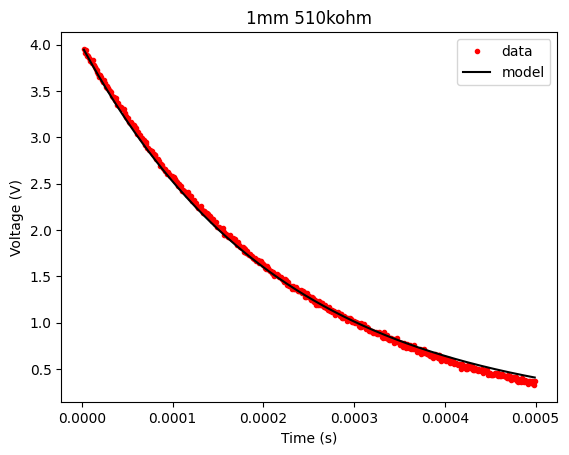

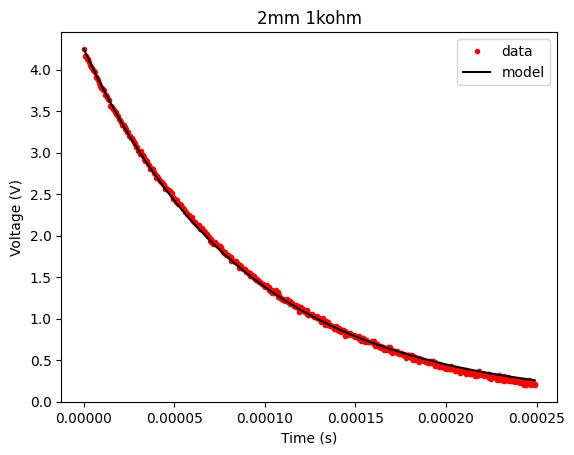

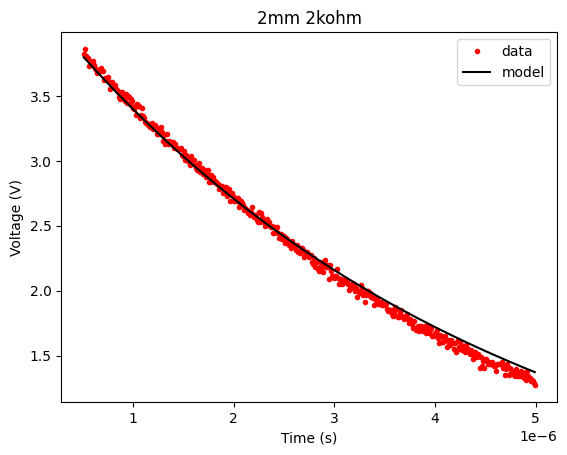

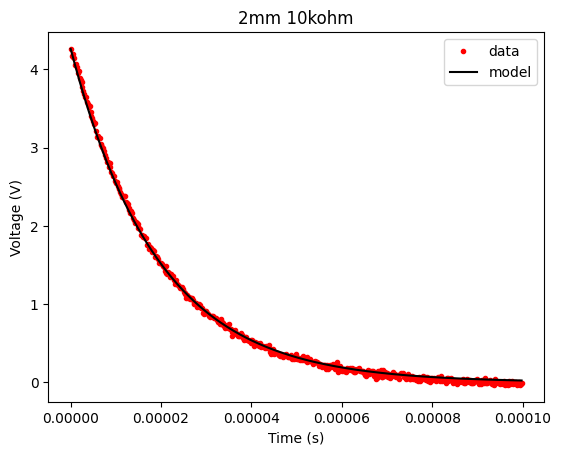

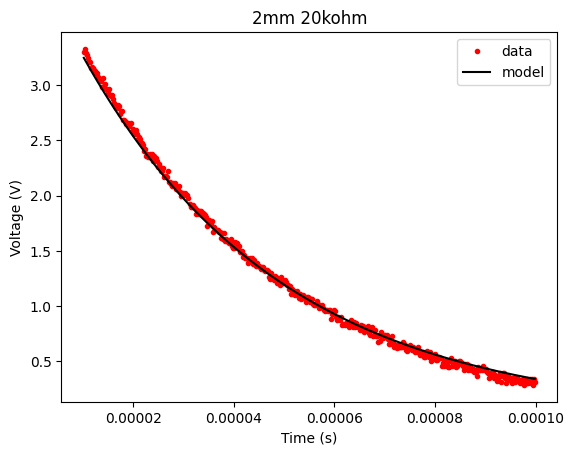

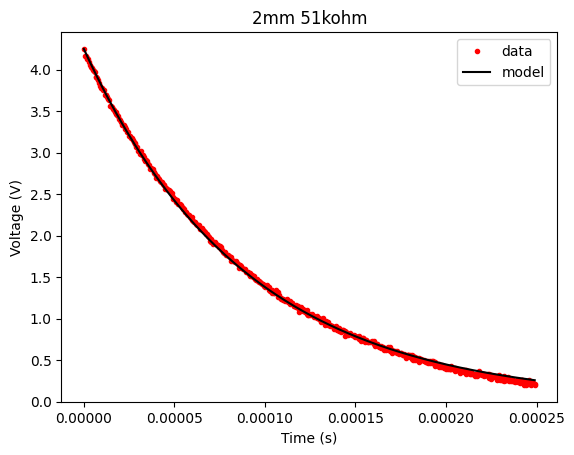

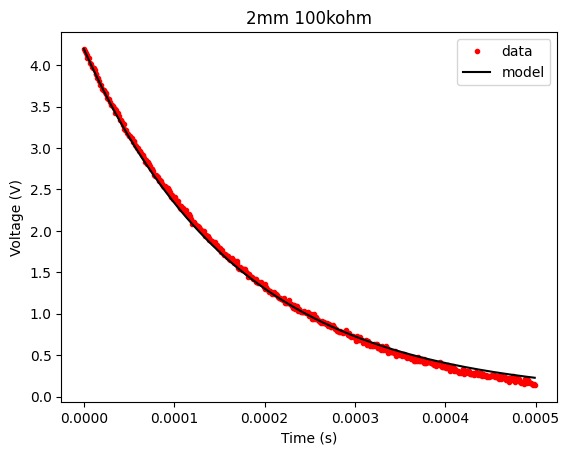

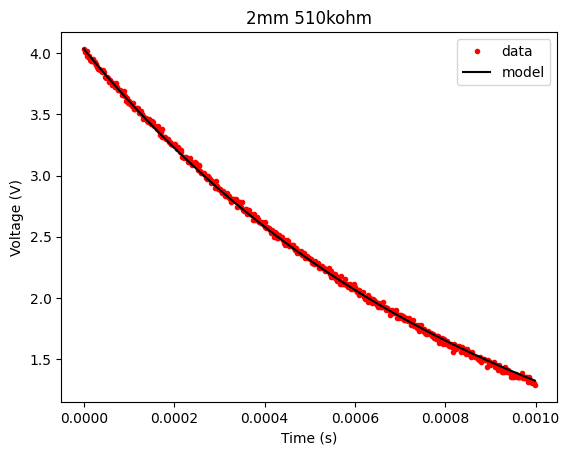

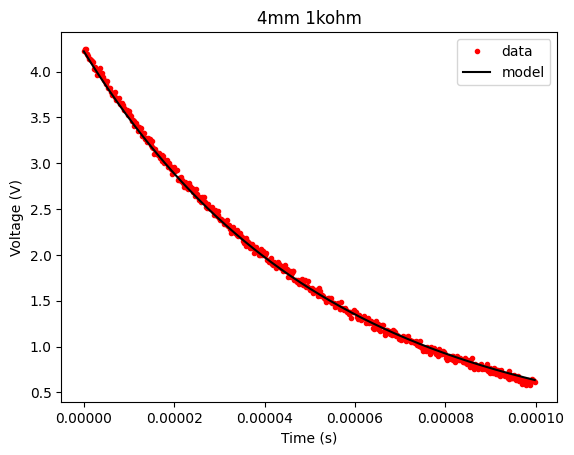

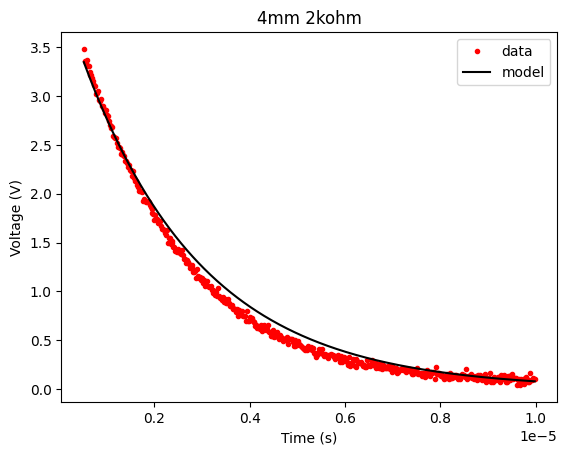

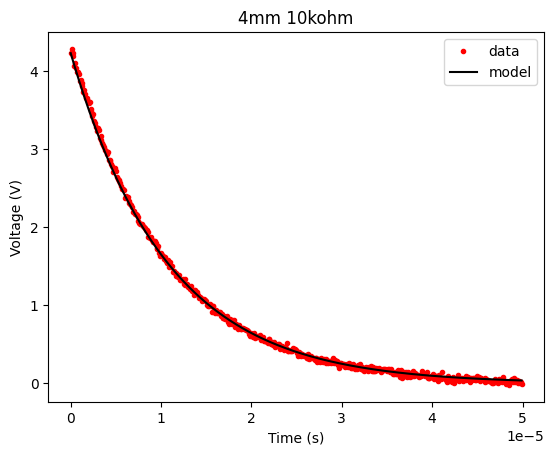

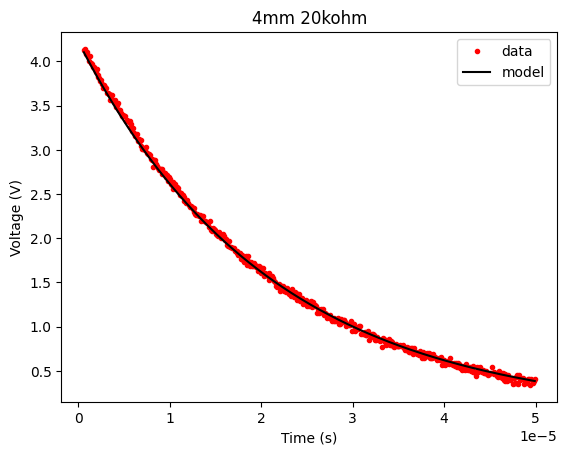

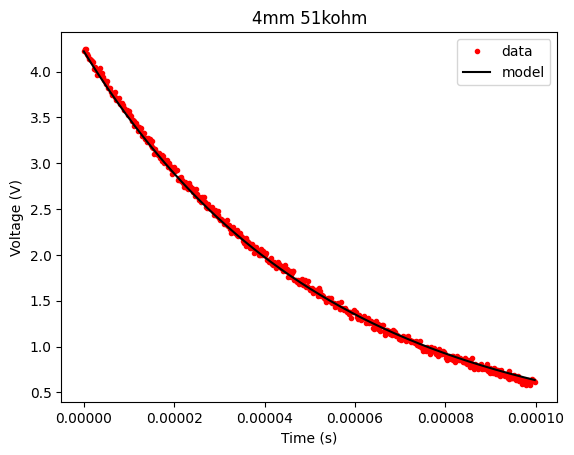

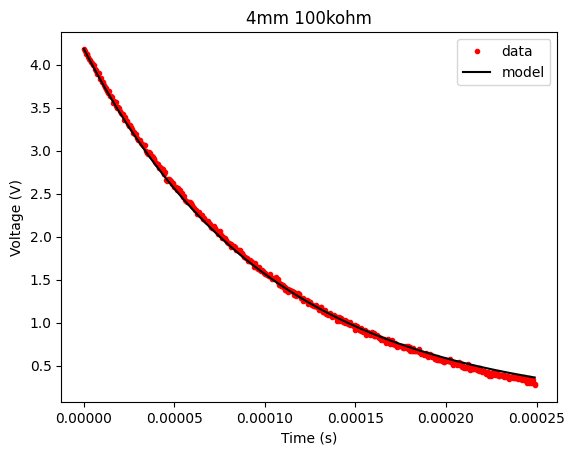

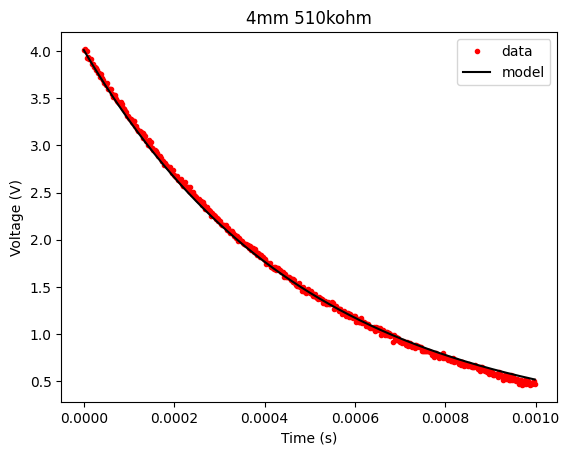

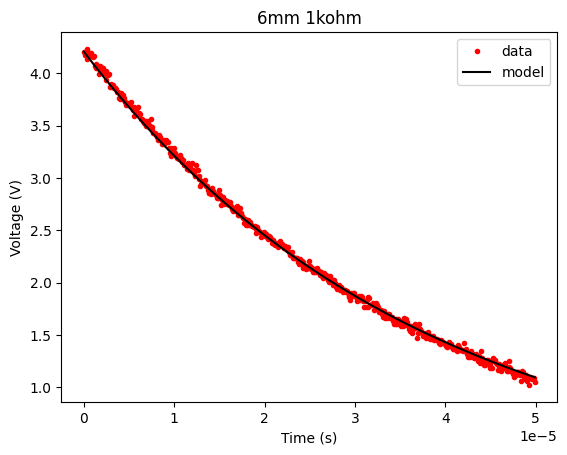

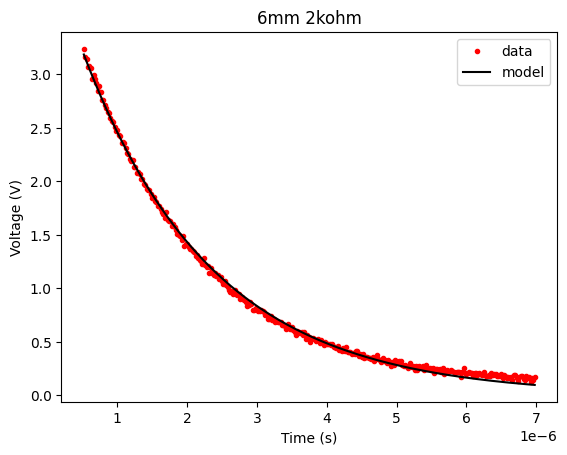

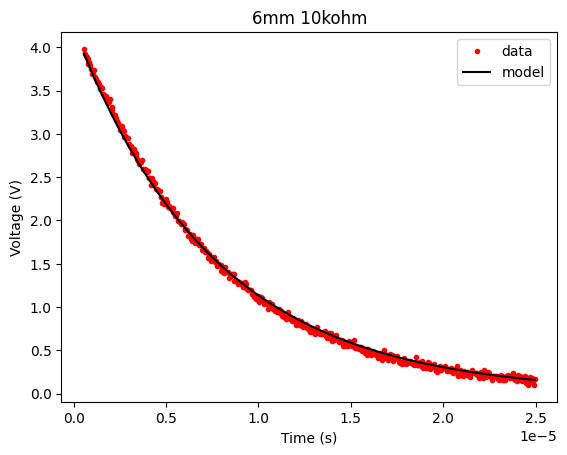

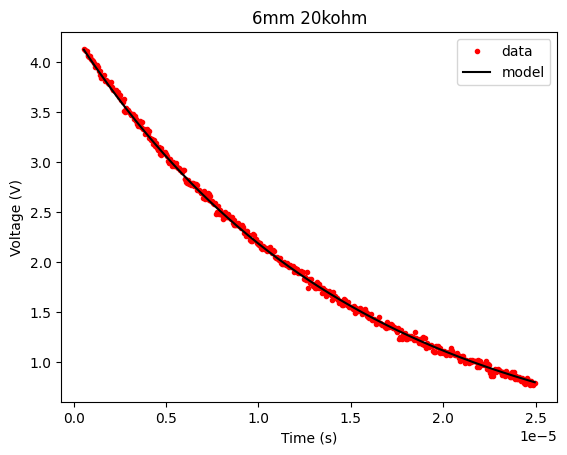

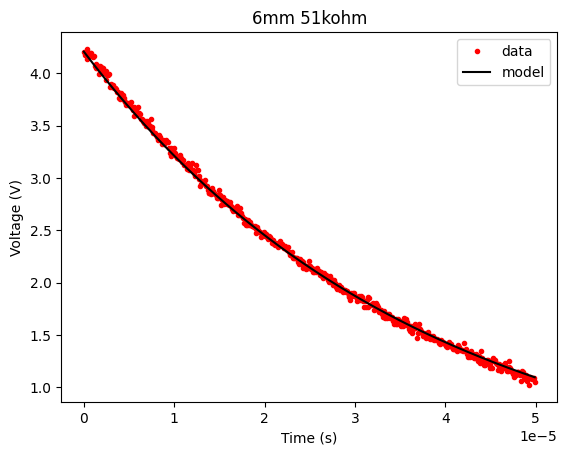

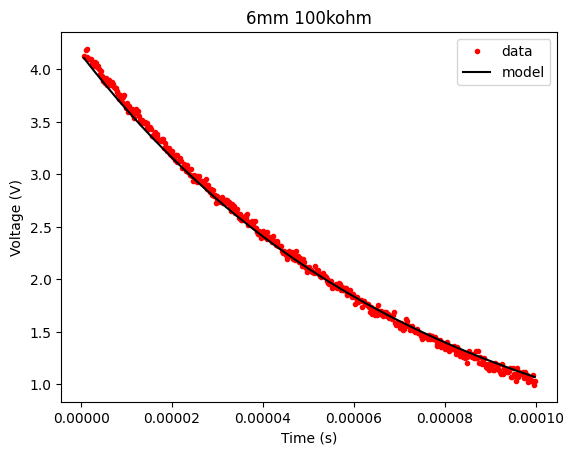

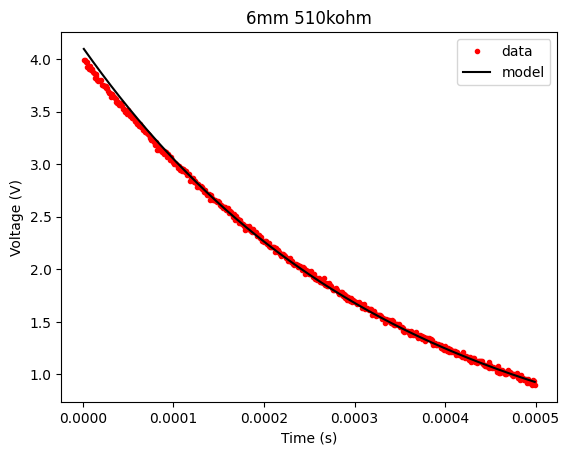

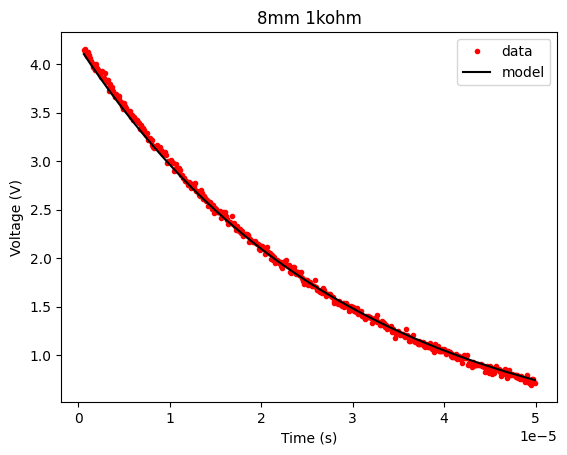

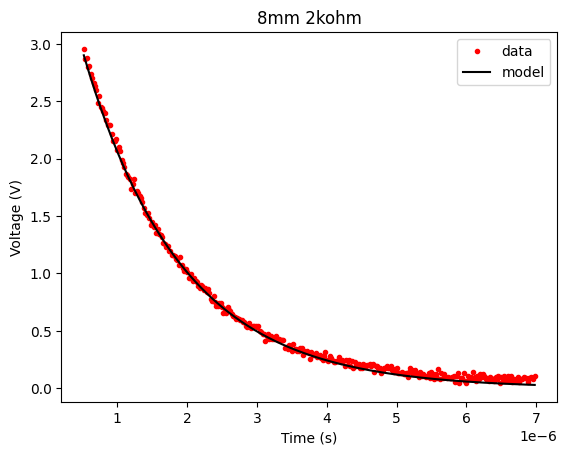

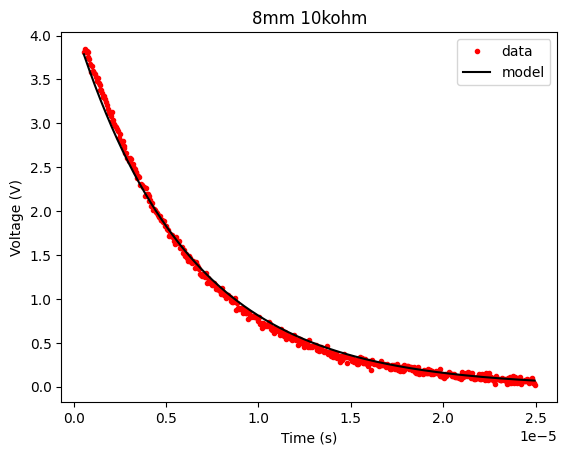

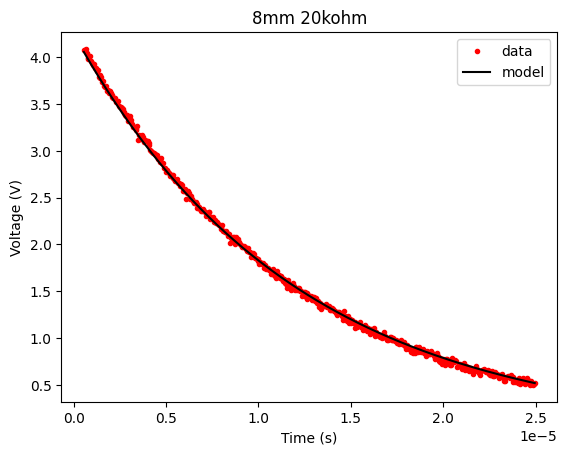

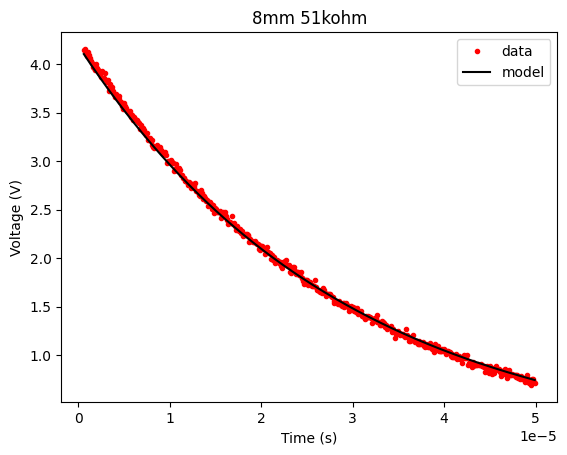

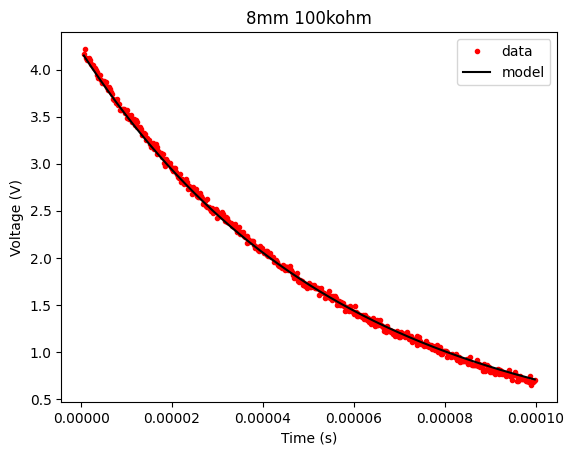

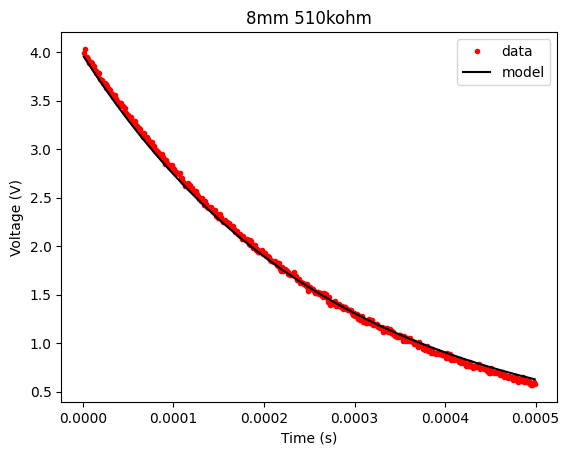

In [10]:
##Recall that our primary lists are: 
'''
truncated_capacitor_unfilled_dict_list
truncated_capacitor_filled_dict_list
''' 

####UNFILLED MODELS###### 

def voltage_model(x, v_0, tau):  
  return v_0*np.exp(-x/tau) 
 
def unfilled_model_func(data_vals: list, y_intercepts: list): 
  #full_data_len = len(data) * len(data[0])  
  distances = ["1mm", "2mm", "4mm", "6mm", "8mm"]
  models_composite = [] 
  keys_list = list(data_vals[0].keys())
  for i in range(len(data_vals)): 
    for j in range(len(data_vals[i])): 
      model = lm.models.Model(voltage_model)  
      end_voltage = data_vals[i][keys_list[j]]["Ch 1  (V)"].to_numpy()[-1]  
      model.set_param_hint("v_0", value = y_intercepts[i][j], min = y_intercepts[i][j] -0.001 , max = y_intercepts[i][j] + 0.001) 
      model.set_param_hint("tau", value = 0.1, min = -0.3, max = 0.3) 
      #model.set_param_hint("c", value = end_voltage, min = end_voltage - 0.1, max = end_voltage + 0.1) 
      my_params = model.make_params() 
      model_fit_result = model.fit(data = data_vals[i][keys_list[j]]["Ch 1  (V)"].to_numpy(), x = data_vals[i][keys_list[j]]["Time(s)"].to_numpy(), params = my_params) 
      report = model_fit_result.fit_report() 
      print(report)
      y_vals_model = model_fit_result.eval(x = data_vals[i][keys_list[j]]["Time(s)"].to_numpy())  
      model_and_model_fit_report = (model, report) 
      models_composite.append(model_and_model_fit_report)
      plt.figure() 
      plt.plot(data_vals[i][keys_list[j]]["Time(s)"].to_numpy(), data_vals[i][keys_list[j]]["Ch 1  (V)"].to_numpy(), ".", color = "red",)
      plt.plot(data_vals[i][keys_list[j]]["Time(s)"].to_numpy(), y_vals_model, color = "black", linestyle = "-") #Model  
      plt.xlabel("Time (s)") 
      plt.ylabel("Voltage (V)")
      plt.title(distances[i] + " " + keys_list[j])  
      plt.legend(["data", "model"])
  
  return models_composite 


unfilled_models_report = unfilled_model_func(truncated_capacitor_unfilled_dict_list, v_naught_val_unfilled_estimates) 

##Extracting Tau and Tau Uncertainty $\sigma_T$

In [11]:
#UNFILLED 
def tau_data_extractor(model_reports: list, type_data: str) -> list: 
  ''' Function to take out tau and tau uncertainty from a fit report and return them as a tuple within 
  a larger list of similarly formatted tuples''' 

  full_tau_and_uncertainty_list = []
  for i in range(len(model_reports)):
    tau_and_uncertainty_sublist = []
    #print(model_reports[i][1].split())
    for j in range(len(model_reports[i][1].split())):
      if model_reports[i][1].split()[j] == "tau:":   
        #print("hi") 
        tau_and_uncertainty_sublist.append((float(model_reports[i][1].split()[j+1]), float(model_reports[i][1].split()[j+3])))  
    #print(tau_and_uncertainty_sublist) #working: each sublist has a tau value and its associated uncertainty
    #the order will be first 7: 1mm sep distance, second 7, 2mm sep distance, third 7, 4 mm separation distance, then 6mm and 8mm. 
    full_tau_and_uncertainty_list.append(tau_and_uncertainty_sublist) 

  if type_data == "unfilled":
    list_1 = [full_tau_and_uncertainty_list[0:7]] #for 1mm
    list_2 = [full_tau_and_uncertainty_list[7:14]] #for 2mm 
    list_3 = [full_tau_and_uncertainty_list[14:21]] #for 4 mm 
    list_4 = [full_tau_and_uncertainty_list[21:28]] #for 6 mm 
    list_5 = [full_tau_and_uncertainty_list[28:35]] #for 8 mm
  
    composite = [list_1, list_2, list_3, list_4, list_5]
    #print(composite[0]) 
    #print(composite[1])
   
    return composite

  elif type_data == "filled": 
    list_1 = [full_tau_and_uncertainty_list[0:7]] 
    list_2 = [full_tau_and_uncertainty_list[7:14]] 
    list_3 = [full_tau_and_uncertainty_list[14:21]] 
    list_4 = [full_tau_and_uncertainty_list[21:28]] 

    composite = [list_1, list_2, list_3, list_4] 
  
    return composite

tau_uncertainty_result = tau_data_extractor(unfilled_models_report, "unfilled") #tau has units of ohms times farads = seconds 
#TAU EXTRACTOR IS WORKING

Calculating C and $\sigma_C$


To calculate the uncertainty associated with the capacitance, we work with the formula 

$$C = \frac{\tau}{R}$$ and perform an error propagation. Our equation for $\sigma_{C}$ will take the form 


$$
\sigma_{C} = \sqrt{ \left( \frac{\partial{C}}{\partial{\tau}} \right)^2 \sigma_{\tau}^2 + \left( \frac{\partial{C}}{\partial{R}} \right)^2 \sigma_{R}^2},
$$

where our uncertainty value for $\tau$ $ \sigma_{\tau}$ is extracted from the model while the resistance uncertainty is the resistor tolerance. The tolerance is obtained by reading markings on the resistor. We obtain tolerances of 0.02*1kohm for the 1kohm resistor while for all other resistors, we obtain their tolerance by multiplying by 0.05 because they have a gold tolerance line. The above partial derivatives can be evaluated to obtain  

$$\sigma_{C} = \sqrt{ \left( \frac{1}{R} \right)^2 \sigma_{\tau}^2 + \left( \frac{-\tau}{R^2} \right)^2 \sigma_{R}^2}.
$$



In [12]:
##now that we have tau (see above cell)

tolerance_1kohm = (0.02*1)*1000 #obtained by looking at forth resistor stripe to get 2%
tolerance_2kohm = (0.05*2)*1000
tolerance_10kohm = (0.05*10)*1000
tolerance_20kohm = (0.05*20)*1000
tolerance_51kohm = (0.05*51)*1000
tolerance_100kohm = (0.05*100)*1000
tolerance_510kohm = (0.05*510)*1000

tolerances = [tolerance_1kohm, tolerance_2kohm, tolerance_10kohm, tolerance_20kohm, tolerance_51kohm, tolerance_100kohm, tolerance_510kohm]

def calculate_capacitance_unfilled(tau_values: list, tolerance_values: list) -> tuple: 

  #capacitance 
  tolerance_array = np.array(tolerance_values) 
  resistance_array = np.array([1, 2, 10, 20, 51, 100, 510])*1000 #ohm
  one_mm_list = tau_values[0]; two_mm_list = tau_values[1]; four_mm_list = tau_values[2]; six_mm_list = tau_values[3];  eight_mm_list = tau_values[4] 
  
  one_mm_tau_vals = [] #w\o uncertainty 
  two_mm_tau_vals = [] 
  four_mm_tau_vals = [] 
  six_mm_tau_vals = [] 
  eight_mm_tau_vals = [] 

  for i in range(len(one_mm_list)): 
    for j in range(len(one_mm_list[i])): 
      #print(one_mm_list[i][j]) #note that 510 kohm value from this is the largest tau and largest uncertainty
      one_mm_tau_vals.append(one_mm_list[i][j][0][0]) 
      two_mm_tau_vals.append(two_mm_list[i][j][0][0]) 
      four_mm_tau_vals.append(four_mm_list[i][j][0][0]) 
      six_mm_tau_vals.append(six_mm_list[i][j][0][0]) 
      eight_mm_tau_vals.append(eight_mm_list[i][j][0][0]) 
  
  #print(one_mm_tau_vals)
  #print(two_mm_tau_vals)

  #EVERYTHING WORKING UP TO THIS POINT
  
  one_mm_cap_arr = np.array(one_mm_tau_vals) / resistance_array  #units of F (farad)
  #print(one_mm_cap_arr)
  two_mm_cap_arr = np.array(two_mm_tau_vals) / resistance_array #units of F
  four_mm_cap_arr = np.array(four_mm_tau_vals) / resistance_array #units of F
  six_mm_cap_arr = np.array(six_mm_tau_vals) / resistance_array #units of F
  eight_mm_cap_arr = np.array(eight_mm_tau_vals) / resistance_array #units of F

  #print(one_mm_tau_vals) 
  #composite_tau_array = np.append([one_mm_tau_vals], [[two_mm_tau_vals], [four_mm_tau_vals], [six_mm_tau_vals], [eight_mm_tau_vals]]) #.append(four_mm_tau_vals).append(six_mm_tau_vals).append(eight_mm_tau_vals)  
  
  capacitance_dictionary = {"1mm": one_mm_cap_arr, "2mm": two_mm_cap_arr, "4mm": four_mm_cap_arr, "6mm": six_mm_cap_arr, "8mm": eight_mm_cap_arr}
  #dictionary of capacitances; each array contains capacitance values for seven resistors at the distance key
  composite_tau_list = [one_mm_tau_vals, two_mm_tau_vals, four_mm_tau_vals, six_mm_tau_vals, eight_mm_tau_vals]
  #uncertainty 

  one_mm_tau_uncertainty_vals = [] 
  two_mm_tau_uncertainty_vals =[] 
  four_mm_tau_uncertainty_vals = [] 
  six_mm_tau_uncertainty_vals = [] 
  eight_mm_tau_uncertainty_vals = [] 

  for i in range(len(one_mm_list)): 
    for j in range(len(one_mm_list[i])): 
      #print(one_mm_list[i][j]) #note that 510 kohm value from this is the largest tau and largest uncertainty
      one_mm_tau_uncertainty_vals.append(one_mm_list[i][j][0][1]) 
      two_mm_tau_uncertainty_vals.append(two_mm_list[i][j][0][1]) 
      four_mm_tau_uncertainty_vals.append(four_mm_list[i][j][0][1]) 
      six_mm_tau_uncertainty_vals.append(six_mm_list[i][j][0][1]) 
      eight_mm_tau_uncertainty_vals.append(eight_mm_list[i][j][0][1])  
  
  #composite_tau_uncertainty_array = np.append([one_mm_tau_uncertainty_vals], [[two_mm_tau_uncertainty_vals], [four_mm_tau_uncertainty_vals],
   #                                           [six_mm_tau_uncertainty_vals], [eight_mm_tau_uncertainty_vals]]) 

  composite_tau_uncertainty_list = [one_mm_tau_uncertainty_vals, two_mm_tau_uncertainty_vals, four_mm_tau_uncertainty_vals, six_mm_tau_uncertainty_vals, 
                                    eight_mm_tau_uncertainty_vals]

  capacitor_uncertainties = []
  for i in range(5): 
    sublist = [] 
    for j in range(len(tolerances)): #tolerances of length 7 
        first_component = ((1/resistance_array[j])**2)*(composite_tau_uncertainty_list[i][j]**2)
        second_component = (-composite_tau_list[i][j] / resistance_array[j]**2)**2 * (tolerances[j]**2) 
        resultant_uncertainty = np.sqrt(first_component + second_component) 
        sublist.append(resultant_uncertainty)
    capacitor_uncertainties.append(sublist)
  
  #print(capacitor_uncertainties) #these values are less than the capacitance so they are good
  
  capacitor_uncertainties_dict = {"1mm": capacitor_uncertainties[0], "2mm": capacitor_uncertainties[1], 
                                  "4mm": capacitor_uncertainties[2], "6mm": capacitor_uncertainties[3], 
                                  "8mm": capacitor_uncertainties[4]} 
  
  return capacitor_uncertainties_dict, capacitance_dictionary 

unfilled_cap_uncertainties, unfilled_cap_values = calculate_capacitance_unfilled(tau_uncertainty_result, tolerances) 
print(unfilled_cap_values["1mm"]) 
print(unfilled_cap_uncertainties["1mm"])


[2.34900000e-08 6.27850000e-10 4.82580000e-10 4.77295000e-10
 4.59960784e-10 4.60140000e-10 4.29274510e-10]
[4.722904613095632e-10, 3.4098558803855624e-11, 2.4393047070015666e-11, 2.3979905652962857e-11, 2.3018060444233335e-11, 2.3014576925507444e-11, 2.1482654490980724e-11]


##key associated measurements and their uncertainties to calculate $\epsilon_0$ 

To get area uncertainty, we need to use something of the form: 

$$\sigma_A =  \sqrt{ \left( \frac{\partial{A}}{\partial{r}} \right)^2 \sigma_{r}^2}$$
$$= \sqrt{ \left( \pi \right)^2 \sigma_{r}^2}$$ 

where A is area and r is radius

In [13]:
##Calculating permittivity 
#C*d / A = eps_naught 

distances = [0.001, 0.002, 0.004, 0.006, 0.008] #capacitor separations converted to distances in #m
distance_uncertainty = (1e-5) /2 #precision of the micrometer in m (from 0.01mm /2 )
capacitor_radius = 14.2/100 #m  
print(capacitor_radius)
radius_measurement_uncertainty = 0.5/100 #m; uncertainty from ruler 
print(radius_measurement_uncertainty)
Area = np.pi**(capacitor_radius**2) #m^2 
print(Area)
Area_uncertainty = np.sqrt((np.pi**2)*(radius_measurement_uncertainty**2)) #m^2
print(Area_uncertainty)



0.142
0.005
1.0233507920475675
0.015707963267948967


##Calculating $\epsilon_0$, the permittivity of free space (or electric constant) for the unfilled case

To calculate $\sigma_{\epsilon_0}$, we will need to perform another error propagation using the equation 

$$\epsilon_0 = \frac{C d}{A}.$$ 

We then have: 

$$
\sigma_{\epsilon_0} = \sqrt{ \left( \frac{\partial{\epsilon_0}}{\partial{d}} \right)^2 \sigma_{d}^2 + \left( \frac{\partial{\epsilon_0}}{\partial{C}} \right)^2 \sigma_{C}^2 + \left( \frac{\partial{\epsilon_0}}{\partial{A}} \right)^2 \sigma_{A}^2}.
$$

Taking the derivatives of the above, we arrive at the equation: 

$$\sigma_{\epsilon_0} = \sqrt{ \left( \frac{C}{A} \right)^2 \sigma_{d}^2 + \left( \frac{d}{A} \right)^2 \sigma_{C}^2 + \left( \frac{-d C}{A^2} \right)^2 \sigma_{A}^2}$$



In [14]:

def epsilon_naught_unfilled_calculator(distances: list, distance_uncertainty: float, area: float, area_uncertainty: float, capacitance: dict, capacitance_uncertainty: dict) -> list: 
  #distances is of len 5 
  #capacitance and capacitance uncertainty dict have five keys 
  eps_naught_list = []
  sigma_eps_naught_list = []
  for i in range(len(distances)): 
    distance_multiplier = distances[i] 
    if i == 0:
      #reg. eps_0
      capacitance_array = capacitance["1mm"] 
      eps_naught_array = (capacitance_array*distance_multiplier) / area  
      eps_naught_list.append(eps_naught_array)
      #uncertainty eps_0
      
      capacitance_uncertainty_array = np.array(capacitance_uncertainty["1mm"])  
      first_component = ((capacitance_array / area)**2)*(distance_uncertainty**2) 
      #print(first_component)
      second_component = ((distance_multiplier / area)**2)*(capacitance_uncertainty_array**2) 
      #print(second_component)
      third_component = (((-distance_multiplier * capacitance_array)/(area**2))**2) * (area_uncertainty**2)  
      #print(third_component)
      eps_naught_uncertainty_array = np.sqrt(first_component + second_component + third_component) 
      sigma_eps_naught_list.append(eps_naught_uncertainty_array)

    elif i == 1: 
      #reg. eps_0
      capacitance_array = np.array(capacitance["2mm"]) 
      eps_naught_array = (capacitance_array*distance_multiplier) / area  
      eps_naught_list.append(eps_naught_array)
      #uncertainty eps_0

      capacitance_uncertainty_array = np.array(capacitance_uncertainty["2mm"]) 
      first_component = ((capacitance_array / area)**2)*(distance_uncertainty**2)
      second_component = ((distance_multiplier / area)**2)*(capacitance_uncertainty_array**2)
      third_component = (((distance_multiplier * capacitance_array)/(area**2))**2) * (area_uncertainty**2) 
      eps_naught_uncertainty_array = np.sqrt(first_component + second_component + third_component)
      sigma_eps_naught_list.append(eps_naught_uncertainty_array)

    elif i == 2: 
      #reg. eps_0
      capacitance_array = capacitance["4mm"] 
      eps_naught_array = (capacitance_array*distance_multiplier) / area  
      eps_naught_list.append(eps_naught_array)
      #uncertainty eps_0
      
      capacitance_uncertainty_array = np.array(capacitance_uncertainty["4mm"]) 
      first_component = ((capacitance_array / area)**2)*(distance_uncertainty**2)
      second_component = ((distance_multiplier / area)**2)*(capacitance_uncertainty_array**2)
      third_component = (((distance_multiplier * capacitance_array)/(area**2))**2) * (area_uncertainty**2) 
      eps_naught_uncertainty_array = np.sqrt(first_component + second_component + third_component)
      sigma_eps_naught_list.append(eps_naught_uncertainty_array)


    elif i == 3: 
      #reg. eps_0
      capacitance_array = capacitance["6mm"] 
      eps_naught_array = (capacitance_array*distance_multiplier) / area  
      eps_naught_list.append(eps_naught_array)
      #uncertainty eps_0

      capacitance_uncertainty_array = np.array(capacitance_uncertainty["6mm"]) 
      first_component = ((capacitance_array / area)**2)*(distance_uncertainty**2)
      second_component = ((distance_multiplier / area)**2)*(capacitance_uncertainty_array**2)
      third_component = (((distance_multiplier * capacitance_array)/(area**2))**2) * (area_uncertainty**2) 
      eps_naught_uncertainty_array = np.sqrt(first_component + second_component + third_component)
      sigma_eps_naught_list.append(eps_naught_uncertainty_array)

    elif i == 4:
      #reg. eps_0
      capacitance_array = capacitance["8mm"] 
      eps_naught_array = (capacitance_array*distance_multiplier) / area  
      eps_naught_list.append(eps_naught_array)
      #uncertainty eps_0

      capacitance_uncertainty_array = np.array(capacitance_uncertainty["8mm"]) 
      first_component = ((capacitance_array / area)**2)*(distance_uncertainty**2)
      second_component = ((distance_multiplier / area)**2)*(capacitance_uncertainty_array**2)
      third_component = (((distance_multiplier * capacitance_array)/(area**2))**2) * (area_uncertainty**2) 
      eps_naught_uncertainty_array = np.sqrt(first_component + second_component + third_component)
      sigma_eps_naught_list.append(eps_naught_uncertainty_array)

  return (eps_naught_list, sigma_eps_naught_list)

epsilon_naught_values, epsilon_naught_uncertainty_values = epsilon_naught_unfilled_calculator(distances, distance_uncertainty, Area, Area_uncertainty, unfilled_cap_values, unfilled_cap_uncertainties) 

print(f"eps naught initial is {epsilon_naught_values}") 
print(f"eps naught initial uncert it {epsilon_naught_uncertainty_values}")
 
#PROBLEM UNCERTAINTY LARGER THAN MEASURED VALUES


eps naught initial is [array([2.29540058e-11, 6.13523735e-13, 4.71568502e-13, 4.66404095e-13,
       4.49465411e-13, 4.49640537e-13, 4.19479335e-13]), array([1.73889541e-10, 4.30663662e-12, 3.77563591e-12, 3.89016164e-12,
       3.40959885e-12, 3.34626213e-12, 3.43025380e-12]), array([2.05935249e-10, 4.93906883e-12, 4.15810496e-12, 4.07484905e-12,
       4.03794606e-12, 3.97400386e-12, 3.74011630e-12]), array([2.17251017e-10, 5.42893018e-12, 4.46298575e-12, 4.36214056e-12,
       4.25982386e-12, 4.32514445e-12, 3.85492561e-12]), array([2.25705596e-10, 5.48472727e-12, 4.78983359e-12, 4.63848764e-12,
       4.42559991e-12, 4.37933897e-12, 4.14202552e-12])]
eps naught initial uncert it [array([5.91866485e-13, 3.47613519e-14, 2.50225794e-14, 2.46126761e-14,
       2.36342020e-14, 2.36318306e-14, 2.20576731e-14]), array([4.41362015e-12, 2.73933538e-13, 1.97870883e-13, 2.04062803e-13,
       1.78613294e-13, 1.75401021e-13, 1.79663290e-13]), array([5.22630395e-12, 2.86689609e-13, 2.17789433e-

##CONSTRUCTING A MODEL TO OBTAIN $\epsilon_0$ with $C_{scope}$ subtracted 

This model will have the form 

$$C_{Total} = \frac{a}{x} +b$$ 

where $a = (\epsilon_0)*A$ where $\epsilon_0$ is the mean $\epsilon_0$ that we obtain from the total capacitance $C_total = C_{capacitor} + C_{scope}$. Our model aims to give us a value for $\epsilon_0$ of the capacitor as opposed to an $\epsilon_0$ for the schope and the capacitor. After we obtain a value for a from our model, we will need to divide by the $A$ value to obtain the modified $\epsilon_0$ that does not take into account scope capacitance, which is represented by b. 

Note that since a and A have an associated error, we get the uncertainty on $\epsilon_0$ (which does not take into account distance uncertainty) using 

$$
\sigma_{\epsilon_0} = \sqrt{ \left( \frac{\partial{\epsilon_0}}{\partial{a}} \right)^2 \sigma_{a}^2 + \left( \frac{\partial{\epsilon_0}}{\partial{A}} \right)^2 \sigma_{A}^2},
$$

$$
= \sqrt{ \left( \frac{1}{A} \right)^2 \sigma_{a}^2 + \left( \frac{-a}{A^2} \right)^2 \sigma_{A}^2}
$$




[2.494745711675114e-11, 2.494745711675114e-11, 2.494745711675114e-11, 2.494745711675114e-11]


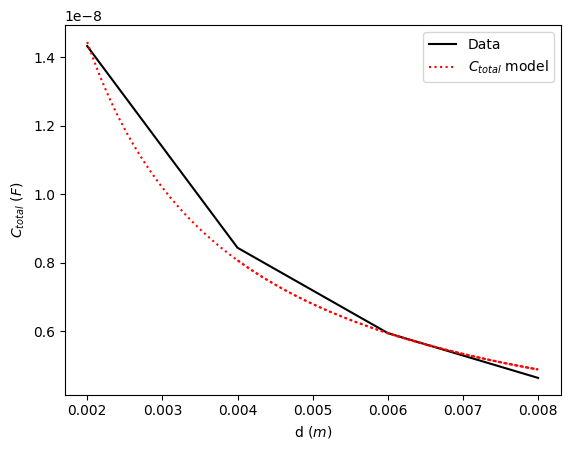

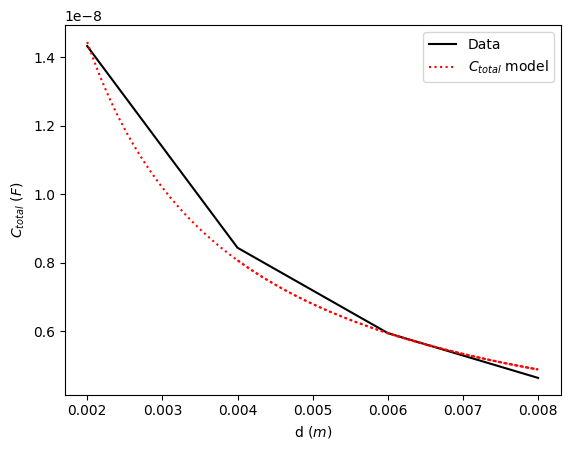

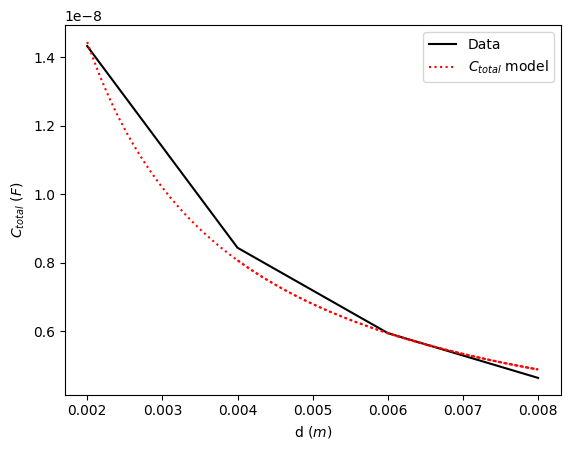

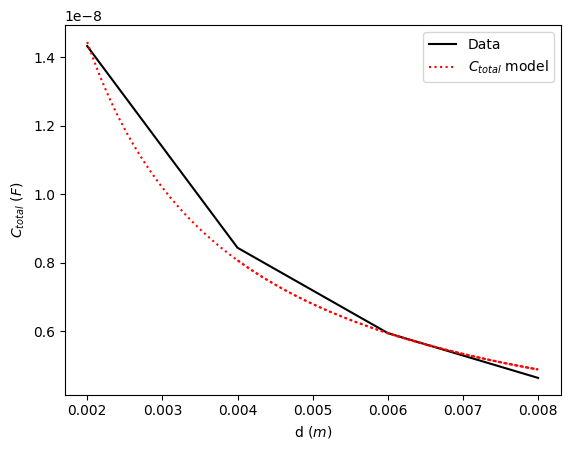

In [15]:
def real_eps_naught_model_eq(x, a, b):
  return (a/x) + b

def real_epsilon_naught_from_model_unfilled(c_total: dict, area: float, distances: list, eps_naught_list):  

  #NOTE: IF WE EXCLUDE 1mm we can get a good model 

  area_uncertainty = 0.015707963267948967 #m
  
  #one_mm_eps_naught = epsilon_naught_values[0] 
  two_mm_eps_naught = epsilon_naught_values[1] 
  four_mm_eps_naught = epsilon_naught_values[2] 
  six_mm_eps_naught = epsilon_naught_values[3]
  eight_mm_eps_naught = epsilon_naught_values[4]  

  c_tot_1 = np.mean(c_total["1mm"]); c_tot_2 = np.mean(c_total["2mm"]); c_tot_3 = np.mean(c_total["4mm"]); 
  c_tot_4 = np.mean(c_total["6mm"]); c_tot_5 = np.mean(c_total["8mm"])

  #composite_c = [c_tot_1, c_tot_2, c_tot_3, c_tot_4, c_tot_5]
  composite_c = [c_tot_2, c_tot_3, c_tot_4, c_tot_5]
  #print(distances)
  #print(composite_c[3])

  models = [] 
  model_reports = []
  for key, value in c_total.items(): 
      if key == "2mm": 
        #i == 1 corresponds to 2mm
        model = lm.models.Model(real_eps_naught_model_eq)
        capacitance_total = value #y_values
        epsilon_naught = np.mean(two_mm_eps_naught)
        a_guess = epsilon_naught*area  
        #print(a_guess)

        model.set_param_hint("a", value = a_guess, min = a_guess - 1e-10, max = a_guess + 1e-10)
        model.set_param_hint("b", value = composite_c[3], min = composite_c[3] - 1e-7, max = composite_c[3] + 1e-7) 
        my_params = model.make_params() 
        model_fit_result = model.fit(data = composite_c, x = distances[1:], params = my_params) 
        report = model_fit_result.fit_report()  
        models.append(model)  
        model_reports.append(report)
        y_vals_model = model_fit_result.eval(x = distances[1:])

        x_vals_linspace = np.linspace(distances[1:], distances[-1], 100) 
        new_y_vals_from_linspace = model_fit_result.eval(x = x_vals_linspace)
 
        plt.figure() 
        plt.plot(distances[1:], composite_c, color = "black")
        plt.plot(x_vals_linspace, new_y_vals_from_linspace, color = "red", linestyle = ":")  
        plt.ylabel(r"$C_{total}$ $(F)$") 
        plt.xlabel(r"d $(m)$") #in m
        plt.legend(["Data", r"$C_{total}$ model"])

      elif key == "4mm": 
        #i == 1 corresponds to 2mm
        model = lm.models.Model(real_eps_naught_model_eq)
        capacitance_total = value #y_values
        epsilon_naught = np.mean(four_mm_eps_naught)
        a_guess = epsilon_naught*area  
        #print(a_guess)

        model.set_param_hint("a", value = a_guess, min = a_guess - 1e-10, max = a_guess + 1e-10)
        model.set_param_hint("b", value = composite_c[3], min = composite_c[3] - 1e-7, max = composite_c[3] + 1e-7) 
        my_params = model.make_params() 
        model_fit_result = model.fit(data = composite_c, x = distances[1:], params = my_params) 
        report = model_fit_result.fit_report()  
        models.append(model)  
        model_reports.append(report)
        y_vals_model = model_fit_result.eval(x = distances[1:]) 

        x_vals_linspace = np.linspace(distances[1:], distances[-1], 100) 
        new_y_vals_from_linspace = model_fit_result.eval(x = x_vals_linspace)

        plt.figure() 
        plt.plot(distances[1:], composite_c, color = "black")
        plt.plot(x_vals_linspace, new_y_vals_from_linspace, color = "red", linestyle = ":")  
        plt.ylabel(r"$C_{total}$ $(F)$") 
        plt.xlabel(r"d $(m)$") #in m
        plt.legend(["Data", r"$C_{total}$ model"])

      elif key == "6mm": 
        model = lm.models.Model(real_eps_naught_model_eq)
        capacitance_total = value #y_values
        epsilon_naught = np.mean(six_mm_eps_naught)
        a_guess = epsilon_naught*area  
        #print(a_guess)

        model.set_param_hint("a", value = a_guess, min = a_guess - 1e-10, max = a_guess + 1e-10)
        model.set_param_hint("b", value = composite_c[3], min = composite_c[3] - 1e-7, max = composite_c[3] + 1e-7) 
        my_params = model.make_params() 
        model_fit_result = model.fit(data = composite_c, x = distances[1:], params = my_params) 
        report = model_fit_result.fit_report()  
        models.append(model)  
        model_reports.append(report)
        y_vals_model = model_fit_result.eval(x = distances[1:]) 

        x_vals_linspace = np.linspace(distances[1:], distances[-1], 100) 
        new_y_vals_from_linspace = model_fit_result.eval(x = x_vals_linspace)

        plt.figure() 
        plt.plot(distances[1:], composite_c, color = "black")
        plt.plot(x_vals_linspace, new_y_vals_from_linspace, color = "red", linestyle = ":")   
        plt.ylabel(r"$C_{total}$ $(F)$") 
        plt.xlabel(r"d $(m)$") #in m
        plt.legend(["Data", r"$C_{total}$ model"])

      elif key == "8mm": 
        model = lm.models.Model(real_eps_naught_model_eq)
        capacitance_total = value #y_values
        epsilon_naught = np.mean(eight_mm_eps_naught)
        a_guess = epsilon_naught*area  
        #print(a_guess)

        model.set_param_hint("a", value = a_guess, min = a_guess - 1e-10, max = a_guess + 1e-10)
        model.set_param_hint("b", value = composite_c[3], min = composite_c[3] - 1e-7, max = composite_c[3] + 1e-7) 
        my_params = model.make_params() 
        model_fit_result = model.fit(data = composite_c, x = distances[1:], params = my_params) 
        report = model_fit_result.fit_report()  
        models.append(model)  
        model_reports.append(report)
        y_vals_model = model_fit_result.eval(x = distances[1:]) 

        x_vals_linspace = np.linspace(distances[1:], distances[-1], 100) 
        new_y_vals_from_linspace = model_fit_result.eval(x = x_vals_linspace)

        plt.figure() 
        plt.plot(distances[1:], composite_c, color = "black")
        plt.plot(x_vals_linspace, new_y_vals_from_linspace, color = "red", linestyle = ":") 
        plt.ylabel(r"$C_{total}$ $(F)$") 
        plt.xlabel(r"d $(m)$") #in m
        plt.legend(["Data", r"$C_{total}$ model"])

      #elif i == 1:
      #  model = lm.models.Model(voltage_model)

  C_scope_values = [] #capacitance associated with the scope #b in the model function and associated uncertainty for a given distance (distances considered are 2, 4, 6, 8)
  a_data = [] #this is epsilon_0 * A (we will have to divide by area and do another error propagation to get epsilon_0)

  #print(model_reports[0]) 

  for i in range(len(model_reports)): 
    for j in range(len(model_reports[i].split())):  
      #print(model_reports[i].split()[j])
      if model_reports[i].split()[j] == "a:": 
        a_val = float(model_reports[i].split()[j + 1])
        a_uncertainty = float(model_reports[i].split()[j + 3])  
        a_data.append((a_val, a_uncertainty))
      if model_reports[i].split()[j] == "b:": 
        c_scope = float(model_reports[i].split()[j + 1])
        c_scope_uncertainty = float(model_reports[i].split()[j + 3])  
        C_scope_values.append((c_scope, c_scope_uncertainty))


  #print(C_scope_values[0]) 
  #print(a_data[0]) 

  epsilon_naught_new_vals = [] 
  epsilon_naught_sigma_vals = [] 

  for i in range(len(C_scope_values)): 
    epsilon_naught = a_data[i][0] / area  
    epsilon_naught_new_vals.append(epsilon_naught) 

    first_sigma_component = ((1/area)**2) * (a_data[i][1]**2) 
    second_sigma_component =  (((-a_data[i][0]) / (area**2))**2) * (area_uncertainty**2)  
    epsilon_uncertainty = np.sqrt(first_sigma_component + second_sigma_component)  

    epsilon_naught_sigma_vals.append(epsilon_uncertainty) 

  return (C_scope_values,epsilon_naught_new_vals , epsilon_naught_sigma_vals) 

C_scope, epsilon_naught_unfilled_final, epsilon_naught_unfilled_sigma_final = real_epsilon_naught_from_model_unfilled(unfilled_cap_values, Area, distances,epsilon_naught_values)

print(epsilon_naught_unfilled_final)


##Calculating K for the case of the unfilled capacitor (so $K_{air}$)

To calculate K_{air}, the dielectric constant for air, we will make use of the equation 

$$C = \frac{\epsilon_0 K A}{d}$$  

$$K = \frac{C d}{A \epsilon_{vacuum}}$$ 

$$K = \frac{\epsilon_0}{\epsilon_{vacuum}}$$ 

The value of $\epsilon$ for a vacuum is $$8.85418782 \times 10^{-12} \frac{s^4 A^2}{kg \cdot m^3}$$ 

For uncertainty, we have 

$$K_{air} = \sqrt{ \left( \frac{\partial{A}}{\partial{\epsilon_0}} \right)^2 \sigma_{\epsilon_0}^2}$$

$$= \sqrt{ \left( \frac{1}{\epsilon_{vacuum}} \right)^2 \sigma_{\epsilon_0}^2}$$ 

In [16]:
##CACLULATING K for air

k_air_array = [] 
K_air_uncertainty_array = []
for i in range(len(epsilon_naught_unfilled_final)): 
  K_array = epsilon_naught_unfilled_final[i] / (8.85418782 * 10**-12) 
  k_air_array.append(K_array) 

  K_air_uncertainty_array_temp = np.sqrt( ((1/(8.85418782 * 10**-12))**2) * (epsilon_naught_unfilled_sigma_final[i]**2))
  K_air_uncertainty_array.append(K_air_uncertainty_array_temp) 

print(k_air_array) #factor of 2 off 
print(K_air_uncertainty_array)

 

[2.817588425264638, 2.817588425264638, 2.817588425264638, 2.817588425264638]
[0.1303199211426322, 0.1303199211426322, 0.1303199211426322, 0.1303199211426322]


#NOW WE RETURN TO FILLED

Let's start by creating our models

      Time(s)  Ch 1  (V)  Unnamed: 2
0    0.000000   4.276594         NaN
1    0.000001   4.242375         NaN
2    0.000002   4.219250         NaN
3    0.000003   4.202375         NaN
4    0.000004   4.168000         NaN
..        ...        ...         ...
495  0.000495   0.333781         NaN
496  0.000496   0.356594         NaN
497  0.000497   0.345031         NaN
498  0.000498   0.333781         NaN
499  0.000499   0.322219         NaN

[500 rows x 3 columns]
[[Model]]
    Model(voltage_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 91
    # data points      = 500
    # variables        = 2
    chi-square         = 0.25969087
    reduced chi-square = 5.2147e-04
    Akaike info crit   = -3777.43570
    Bayesian info crit = -3769.00648
    R-squared          = 0.99956407
[[Variables]]
    v_0:  4.27759400 +/- 3.3770e-04 (0.01%) (init = 4.276594)
    tau:  2.0479e-04 +/- 2.3944e-07 (0.12%) (init = 0.1)
[[Correlations]] (unreported correlations are 

<ipython-input-17-c54f9b38a82b>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


[[Model]]
    Model(voltage_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 500
    # variables        = 2
    chi-square         = 0.40216213
    reduced chi-square = 8.0755e-04
    Akaike info crit   = -3558.75404
    Bayesian info crit = -3550.32482
    R-squared          = 0.99934824
[[Variables]]
    v_0:  4.21478000 +/- 0.00414728 (0.10%) (init = 4.213781)
    tau:  7.3965e-05 +/- 1.2212e-07 (0.17%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(v_0, tau) = -0.6772
[[Model]]
    Model(voltage_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 78
    # data points      = 500
    # variables        = 2
    chi-square         = 1.97759456
    reduced chi-square = 0.00397107
    Akaike info crit   = -2762.36343
    Bayesian info crit = -2753.93421
    R-squared          = 0.99598221
[[Variables]]
    v_0:  4.32228038 +/- 0.00685565 (0.16%) (init = 4.321281)
    

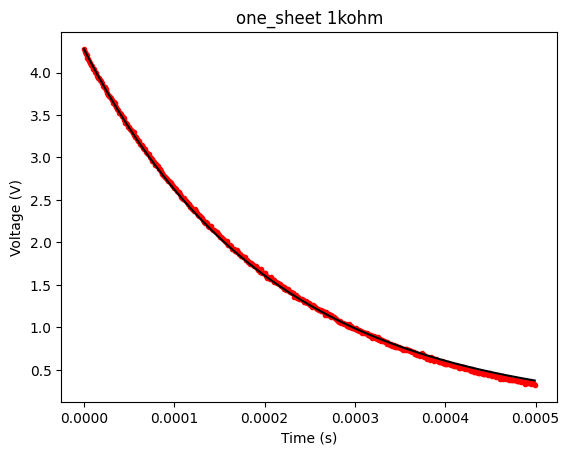

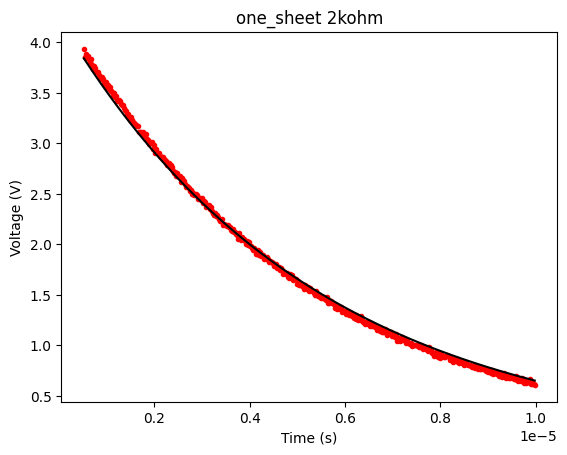

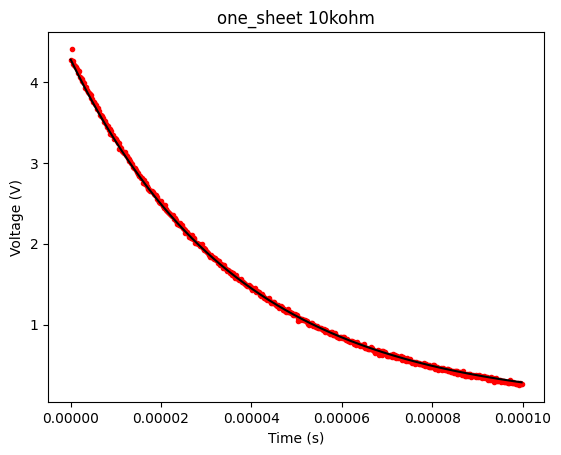

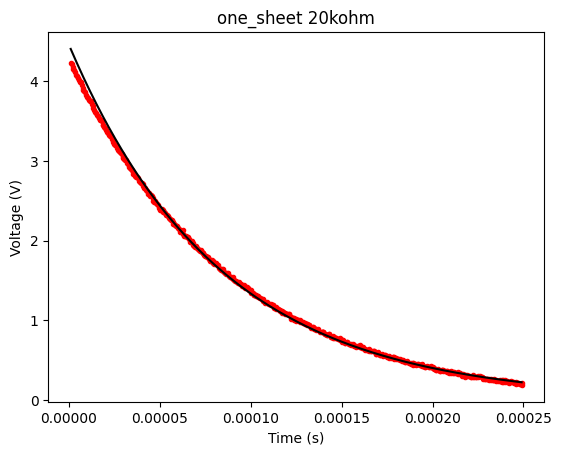

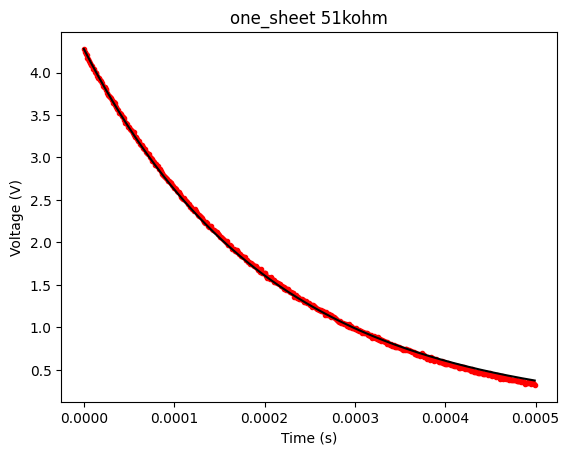

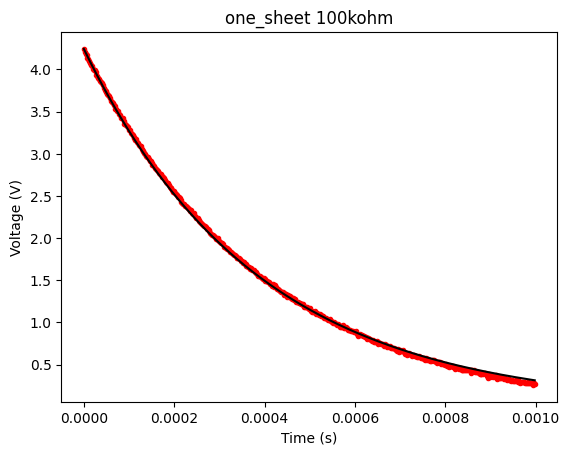

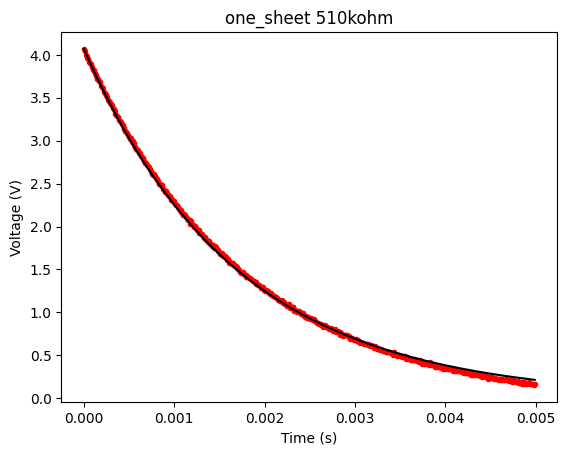

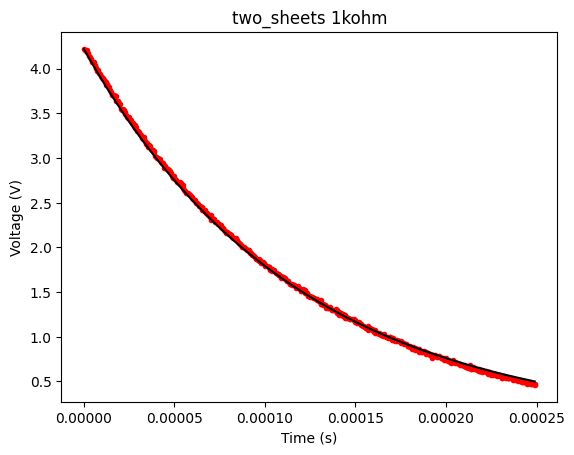

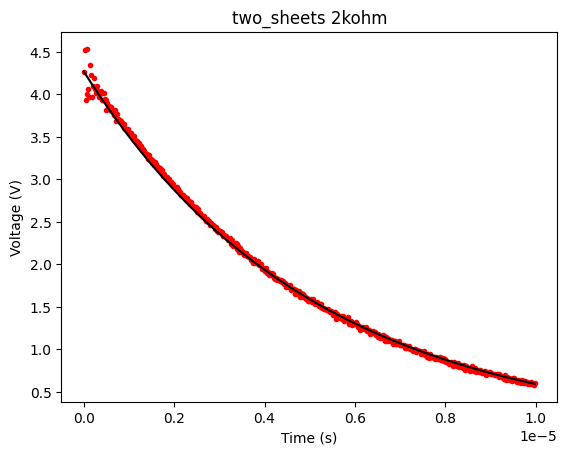

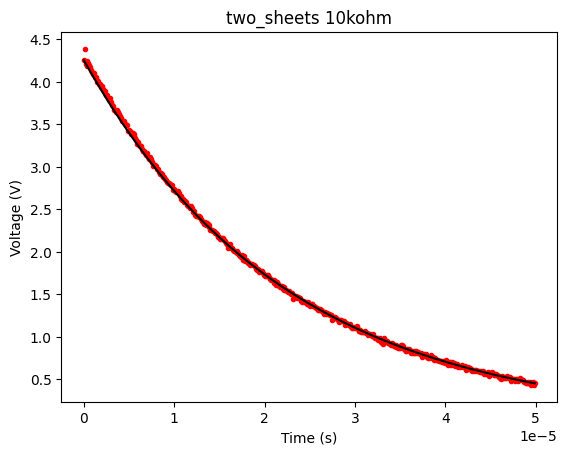

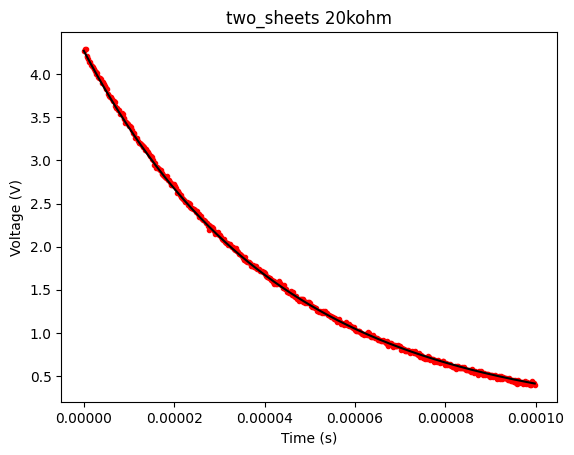

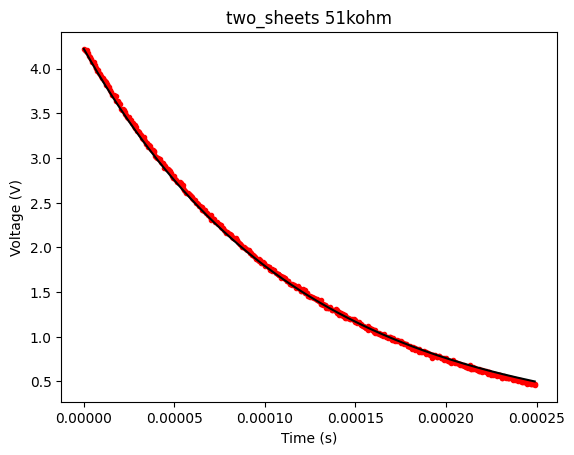

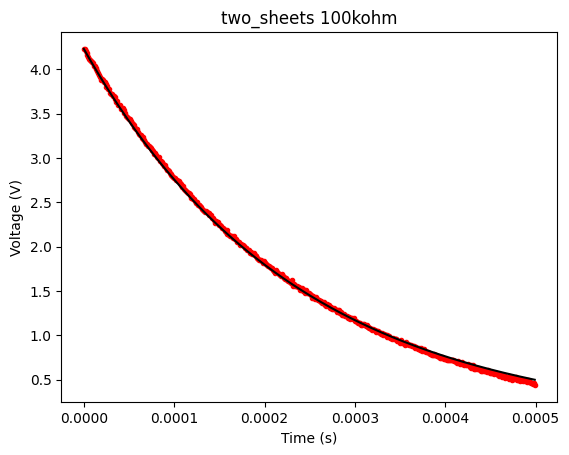

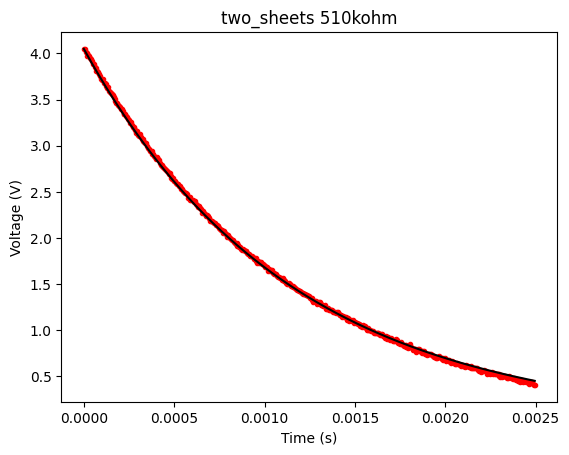

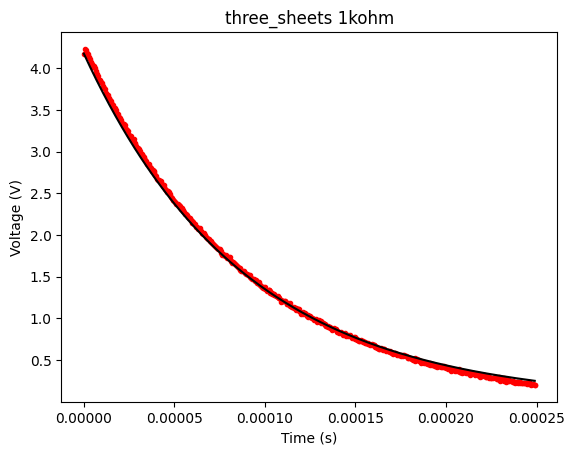

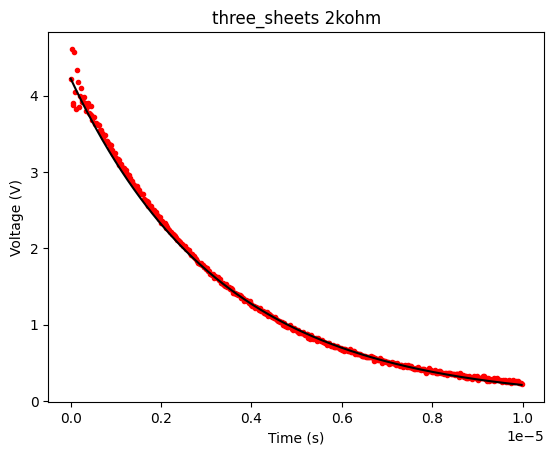

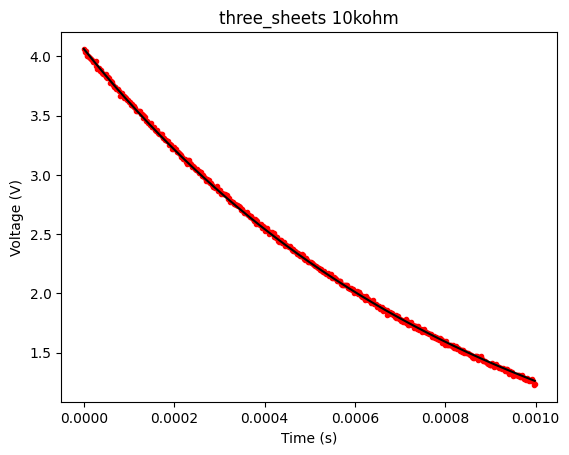

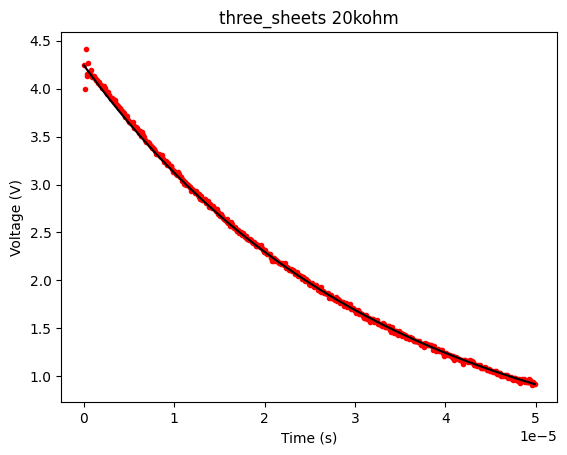

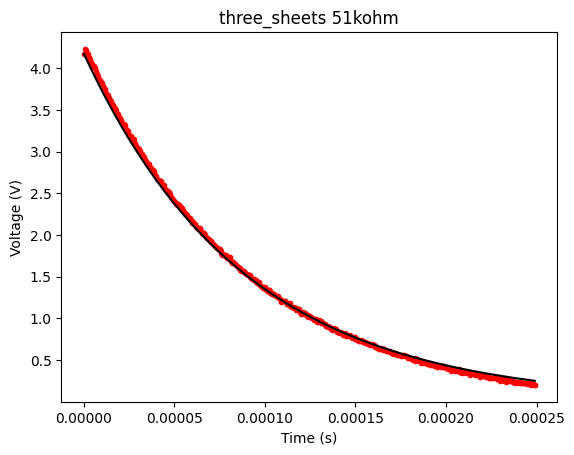

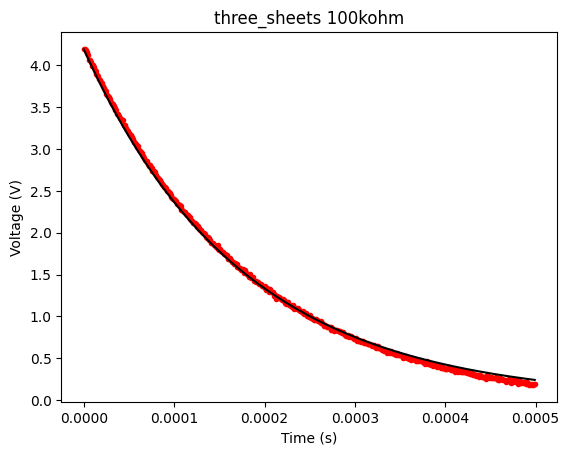

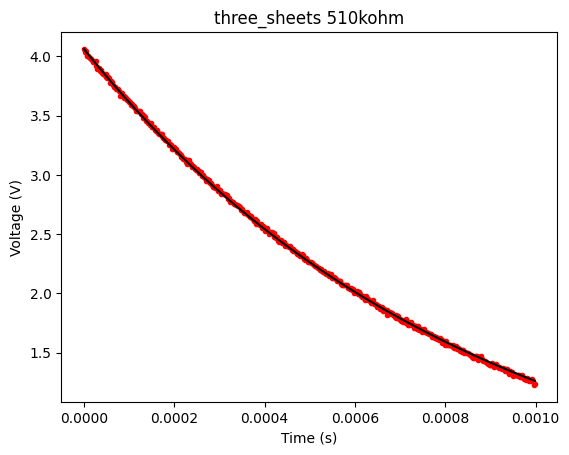

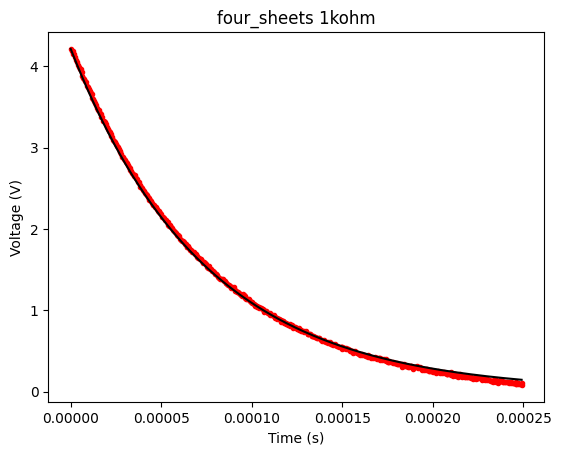

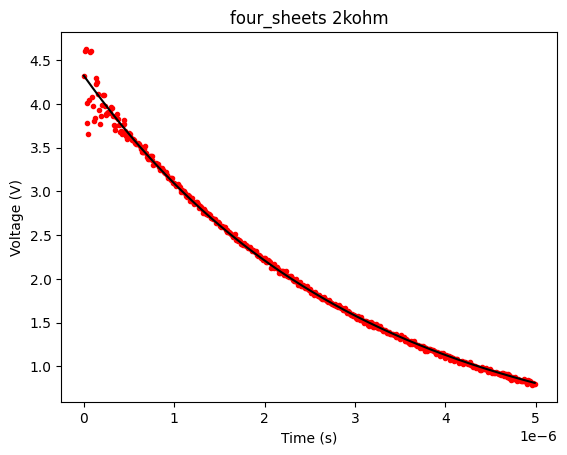

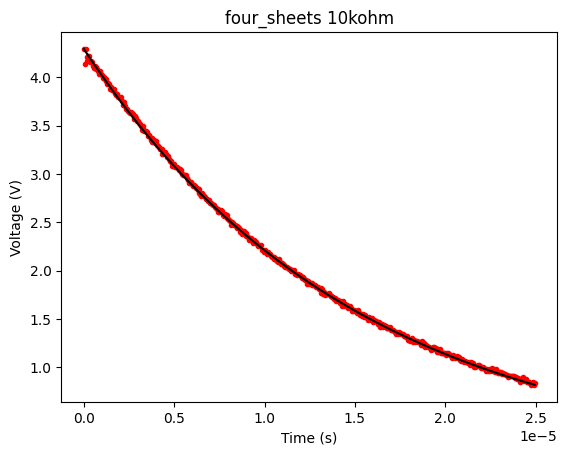

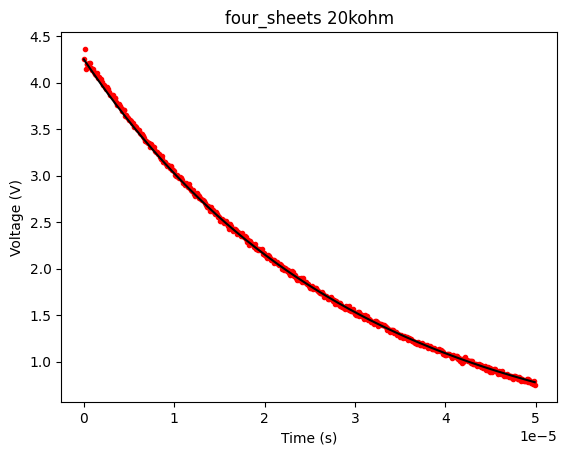

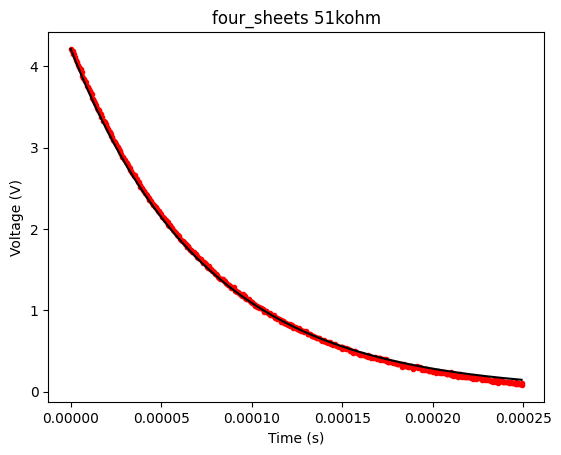

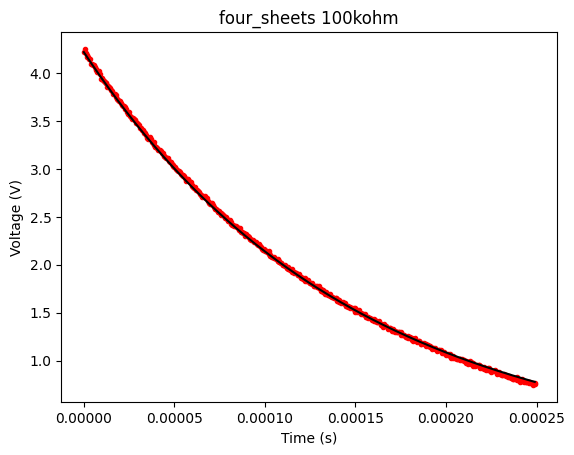

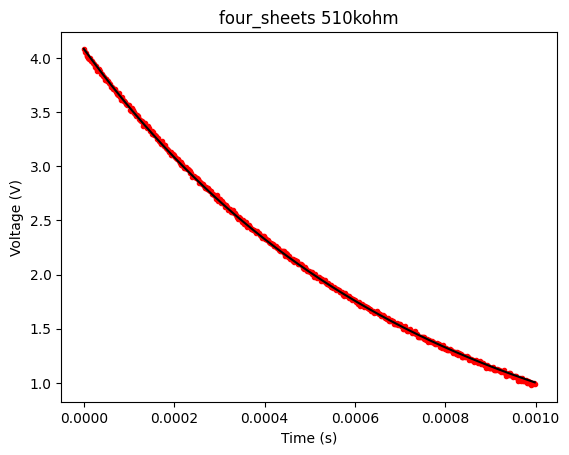

In [17]:
#models: truncated_capacitor_filled_dict_list 
#intercepts: v_naught_val_filled_estimates  

def create_filled_models(capacitor_data, y_intercepts): 
  #the format of capacitor data is four sublists 
  #each sublist (corresponding to a number of added sheets) contains 
  #1kohm - 501kohm keys 
  print(capacitor_data[0]["1kohm"])

  sheet_amounts = ["one_sheet", "two_sheets", "three_sheets", "four_sheets"]
  models_composite = [] 
  keys_list = list(capacitor_data[0].keys())

  for i in range(len(capacitor_data)): 
    for j in range(len(capacitor_data[i])): 
      model = lm.models.Model(voltage_model)  
      end_voltage = capacitor_data[i][keys_list[j]]["Ch 1  (V)"].to_numpy()[-1]  
      model.set_param_hint("v_0", value = y_intercepts[i][j], min = y_intercepts[i][j] -0.001 , max = y_intercepts[i][j] + 0.001) 
      model.set_param_hint("tau", value = 0.1, min = -0.3, max = 0.3) 
      #model.set_param_hint("c", value = end_voltage, min = end_voltage - 0.1, max = end_voltage + 0.1) 
      my_params = model.make_params() 
      model_fit_result = model.fit(data = capacitor_data[i][keys_list[j]]["Ch 1  (V)"].to_numpy(), x = capacitor_data[i][keys_list[j]]["Time(s)"].to_numpy(), params = my_params) 
      report = model_fit_result.fit_report() 
      print(report)
      y_vals_model = model_fit_result.eval(x = capacitor_data[i][keys_list[j]]["Time(s)"].to_numpy())  
      model_and_model_fit_report = (model, report) 
      models_composite.append(model_and_model_fit_report)
      plt.figure() 
      plt.plot(capacitor_data[i][keys_list[j]]["Time(s)"].to_numpy(), capacitor_data[i][keys_list[j]]["Ch 1  (V)"].to_numpy(), ".", color = "red",)
      plt.plot(capacitor_data[i][keys_list[j]]["Time(s)"].to_numpy(), y_vals_model, color = "black", linestyle = "-") #Model  
      plt.xlabel("Time (s)") 
      plt.ylabel("Voltage (V)")
      plt.title(sheet_amounts[i] + " " + keys_list[j]) 
  
  return models_composite 


filled_models_report = create_filled_models(truncated_capacitor_filled_dict_list, v_naught_val_filled_estimates)

Extracting $\tau$ from the filled models

In [18]:
tau_uncertainty_filled_result = tau_data_extractor(filled_models_report, "filled") 
print(tau_uncertainty_filled_result[0]) #format is four sublists, each containing an additional sublist with a tuple; first entry of the tuple is the value and the second is the uncertainty 

[[[(0.00020479, 2.3944e-07)], [(5.3319e-06, 4.7426e-08)], [(3.6935e-05, 3.8806e-08)], [(8.293e-05, 2.1049e-07)], [(0.00020479, 2.3944e-07)], [(0.00038344, 5.0055e-07)], [(0.00169375, 2.6457e-06)]]]


Now we will obtain capacitance for the filled models:

In [19]:
def calculate_capacitance_filled(tau_values: list, tolerance_values: list) -> tuple: 

  #capacitance 
  tolerance_array = np.array(tolerance_values) 
  resistance_array = np.array([1, 2, 10, 20, 51, 100, 510])*1000 #ohm
  one_sheet_list = tau_values[0]; two_sheet_list = tau_values[1]; three_sheet_list = tau_values[2]; four_sheet_list = tau_values[3]
  
  one_sheet_tau_values = [] #w/0 uncertainty
  two_sheet_tau_values = [] 
  three_sheet_tau_values = [] 
  four_sheet_tau_values = [] 

  for i in range(len(one_sheet_list)): 
    for j in range(len(one_sheet_list[i])): 
      #print(one_mm_list[i][j]) #note that 510 kohm value from this is the largest tau and largest uncertainty
      one_sheet_tau_values.append(one_sheet_list[i][j][0][0]) 
      two_sheet_tau_values.append(two_sheet_list[i][j][0][0]) 
      three_sheet_tau_values.append(three_sheet_list[i][j][0][0]) 
      four_sheet_tau_values.append(four_sheet_list[i][j][0][0]) 
  
  #WORKING THUS FAR 
  
  one_sheet_cap_arr = np.array(one_sheet_tau_values) / resistance_array  #units of F (farad)
  #print(one_mm_cap_arr)
  two_sheet_cap_arr = np.array(two_sheet_tau_values) / resistance_array #units of F
  three_sheet_cap_arr = np.array(three_sheet_tau_values) / resistance_array #units of F
  four_sheet_cap_arr = np.array(four_sheet_tau_values) / resistance_array #units of F

  capacitance_dictionary = {"one_sheet": one_sheet_cap_arr, "two_sheets": two_sheet_cap_arr, "three_sheets": three_sheet_cap_arr, "four_sheets": four_sheet_cap_arr}
  #dictionary of capacitances; each array contains capacitance values for seven resistors at the distance key
  composite_tau_list = [one_sheet_tau_values, two_sheet_tau_values, three_sheet_tau_values, four_sheet_tau_values]
  #uncertainty 

  one_sheet_tau_uncertainty_vals = [] 
  two_sheet_tau_uncertainty_vals =[] 
  three_sheet_tau_uncertainty_vals = [] 
  four_sheet_tau_uncertainty_vals = [] 

  for i in range(len(one_sheet_list)): 
    for j in range(len(one_sheet_list[i])): 
      #print(one_mm_list[i][j]) #note that 510 kohm value from this is the largest tau and largest uncertainty
      one_sheet_tau_uncertainty_vals.append(one_sheet_list[i][j][0][1]) 
      two_sheet_tau_uncertainty_vals.append(two_sheet_list[i][j][0][1]) 
      three_sheet_tau_uncertainty_vals.append(three_sheet_list[i][j][0][1]) 
      four_sheet_tau_uncertainty_vals.append(four_sheet_list[i][j][0][1]) 


  composite_tau_uncertainty_list = [one_sheet_tau_uncertainty_vals, two_sheet_tau_uncertainty_vals, three_sheet_tau_uncertainty_vals, four_sheet_tau_uncertainty_vals]

  capacitor_uncertainties = []
  for i in range(4): 
    sublist = [] 
    for j in range(len(tolerances)): #tolerances of length 7 
        first_component = ((1/resistance_array[j])**2)*(composite_tau_uncertainty_list[i][j]**2)
        second_component = (-composite_tau_list[i][j] / resistance_array[j]**2)**2 * (tolerances[j]**2) 
        resultant_uncertainty = np.sqrt(first_component + second_component) 
        sublist.append(resultant_uncertainty)
    capacitor_uncertainties.append(sublist)

  
  capacitor_uncertainties_dict = {"one_sheet": capacitor_uncertainties[0], "two_sheets": capacitor_uncertainties[1], 
                                  "three_sheets": capacitor_uncertainties[2], "four_sheets": capacitor_uncertainties[3]} 
  
  return capacitor_uncertainties_dict, capacitance_dictionary 

filled_cap_uncertainties_total, filled_cap_values_total = calculate_capacitance_filled(tau_uncertainty_result, tolerances) 
#calculate_capacitance_unfilled(tau_uncertainty_filled_result, tolerances) 

Since we already have $C_{scope}$ and $C_{scope}$ uncertainty from the model we created for the unfilled case, we can now subtract $C_{scope}$ from $C_{total}$ for the filled case to obtain our real value for capacistance $C$

In [20]:
#important vars from before: C_scope, epsilon_naught_unfilled_final, epsilon_naught_unfilled_sigma_final  
#print(C_scope) 

#to obtain a singular value for C_scope, we use a weighted average of the four values we get for each of the four distances for the unfilled case: 

weighted_average_numerator = np.sum([C_scope[i][0]*C_scope[i][1] for i in range(len(C_scope))])
weighted_average_denominator = np.sum([C_scope[i][1] for i in range(len(C_scope))]) 
C_scope_best_value = weighted_average_numerator / weighted_average_denominator 
print(C_scope_best_value) 

#now we need to calculate the uncertainty on our best value for C_scope 
sum_vals = []
for i in range(4): 
  sum_vals.append((1/C_scope[i][1])**2) 

interior_of_sqrt = 1/np.sum(sum_vals) 
uncertainty_C_scope_best_value = np.sqrt(interior_of_sqrt)
print(uncertainty_C_scope_best_value)

#for our cap values, we just need to subtract C_scope from C_total  

def calculate_actual_C_filled_case(filled_cap_vals: dict, best_value: float, filled_cap_uncertainties: dict, c_scope_uncertainty: float) -> tuple: 
  one_sheet_vals = np.array(filled_cap_vals["one_sheet"]) - best_value
  two_sheet_vals = np.array(filled_cap_vals["two_sheets"]) - best_value
  three_sheet_vals = np.array(filled_cap_vals["three_sheets"]) - best_value
  four_sheet_vals = np.array(filled_cap_vals["four_sheets"]) - best_value #introducing NEGATIVES HERE
  
  new_cap_dict = {"one_sheet": one_sheet_vals, "two_sheets": two_sheet_vals, "three_sheets": three_sheet_vals, "four_sheets": four_sheet_vals} 

  composite_uncertainty_list = [] 
  for key,value in filled_cap_uncertainties.items():
    new_uncertainty_array = np.array(filled_cap_uncertainties[key]) + c_scope_uncertainty   
    composite_uncertainty_list.append(new_uncertainty_array) 
  
  new_cap_uncertainty_dict = {"one_sheet": composite_uncertainty_list[0], "two_sheets": composite_uncertainty_list[1], "three_sheets": composite_uncertainty_list[2], 
                              "four_sheets": composite_uncertainty_list[3]} 

  return (new_cap_dict, new_cap_uncertainty_dict)


final_c_dict_filled_case, final_c_uncertainty_dict_filled_case = calculate_actual_C_filled_case(filled_cap_values_total, C_scope_best_value, filled_cap_uncertainties_total, uncertainty_C_scope_best_value)

#for our uncertainty values, we need to add the C_scope uncertainty to them 

1.6879999999999998e-09
1.6612500000000003e-10


Now we can obtain the actual value of $\epsilon_0$ for the unfilled case and its associated uncertainty; the process is the same as before with the exact same equations

In [21]:
#C*d / A = eps_naught  
d_measure = np.mean(np.array([0.17, 0.12, 0.13, 0.13]))/1000 #m
d_uncertainty = 2e-5 #m#uncertainty on the calipers  
print(d_measure)  
print(d_uncertainty)
'''
print(Area)
print(Area_uncertainty) 
''' 

def calculate_epsilon_naught_and_uncertainty_filled(c_dict: dict, c_dict_sigmas: dict, area, area_uncertainty, d, d_uncertainty):
 
  eps_naught_list = []
  sigma_eps_naught_list = []

  for key, value in c_dict.items(): 

    if key == "one_sheet":
      #reg. eps_0
      capacitance_array = c_dict["one_sheet"] 
      eps_naught_array = (capacitance_array*d) / area  
      eps_naught_list.append(eps_naught_array)
      #uncertainty eps_0
      
      capacitance_uncertainty_array = c_dict_sigmas["one_sheet"]
      first_component = ((capacitance_array / area)**2)*(d_uncertainty**2) 
      #print(first_component)
      second_component = ((d / area)**2)*(capacitance_uncertainty_array**2) 
      #print(second_component)
      third_component = (((-d * capacitance_array)/(area**2))**2) * (area_uncertainty**2)  
      #print(third_component)
      eps_naught_uncertainty_array = np.sqrt(first_component + second_component + third_component) 
      sigma_eps_naught_list.append(eps_naught_uncertainty_array)
    
    elif key == "two_sheets":
      #reg. eps_0
      capacitance_array = c_dict["two_sheets"] 
      eps_naught_array = (capacitance_array*d) / area  
      eps_naught_list.append(eps_naught_array)
      #uncertainty eps_0
      
      capacitance_uncertainty_array = c_dict_sigmas["two_sheets"]
      first_component = ((capacitance_array / area)**2)*(d_uncertainty**2) 
      #print(first_component)
      second_component = ((d / area)**2)*(capacitance_uncertainty_array**2) 
      #print(second_component)
      third_component = (((-d * capacitance_array)/(area**2))**2) * (area_uncertainty**2)  
      #print(third_component)
      eps_naught_uncertainty_array = np.sqrt(first_component + second_component + third_component) 
      sigma_eps_naught_list.append(eps_naught_uncertainty_array)   

    elif key == "three_sheets":
      #reg. eps_0
      capacitance_array = c_dict["three_sheets"] 
      eps_naught_array = (capacitance_array*d) / area  
      eps_naught_list.append(eps_naught_array)
      #uncertainty eps_0
      
      capacitance_uncertainty_array = c_dict_sigmas["three_sheets"]
      first_component = ((capacitance_array / area)**2)*(d_uncertainty**2) 
      #print(first_component)
      second_component = ((d / area)**2)*(capacitance_uncertainty_array**2) 
      #print(second_component)
      third_component = (((-d * capacitance_array)/(area**2))**2) * (area_uncertainty**2)  
      #print(third_component)
      eps_naught_uncertainty_array = np.sqrt(first_component + second_component + third_component) 
      sigma_eps_naught_list.append(eps_naught_uncertainty_array)   

    elif key == "four_sheets":
      #reg. eps_0
      capacitance_array = c_dict["four_sheets"] 
      eps_naught_array = (capacitance_array*d) / area  
      eps_naught_list.append(eps_naught_array)
      #uncertainty eps_0
      
      capacitance_uncertainty_array = c_dict_sigmas["four_sheets"]
      first_component = ((capacitance_array / area)**2)*(d_uncertainty**2) 
      #print(first_component)
      second_component = ((d / area)**2)*(capacitance_uncertainty_array**2) 
      #print(second_component)
      third_component = (((-d * capacitance_array)/(area**2))**2) * (area_uncertainty**2)  
      #print(third_component)
      eps_naught_uncertainty_array = np.sqrt(first_component + second_component + third_component) 
      sigma_eps_naught_list.append(eps_naught_uncertainty_array)  

  return (eps_naught_list, sigma_eps_naught_list)  

epsilon_naught_list_filled, sigma_epsilon_naught_filled = calculate_epsilon_naught_and_uncertainty_filled(final_c_dict_filled_case, final_c_uncertainty_dict_filled_case, Area, Area_uncertainty, d_measure, d_uncertainty)

0.0001375
2e-05


To obtain the dielectric constant K, we will use two approaches, with the first to calculate it using our obtained $epsilon_0$ for the unfilled case, which, theoretically should be very similar to $epsilon_0$ for a vacuum (although its not). Then we just divide our new value for $\epsilon_0$ by the value for a vacuum

$$K_{unknown} = \frac{\epsilon_{0,filled}}{\epsilon_{air}}$$  

Uncertainty on this will be given by: 

$$
\sigma_{K} = \sqrt{ \left( \frac{\partial{K}}{\partial{\epsilon_{new}}} \right)^2 \sigma_{\epsilon_{new}}^2 + \left( \frac{\partial{K}}{\partial{\epsilon_{air}}} \right)^2 \sigma_{\epsilon_{air}}^2},
$$

$$
= \sqrt{ \left( \frac{-\epsilon_{new}}{\epsilon_{air}^2} \right)^2 \sigma_{\epsilon_{air}}^2 + \left( \frac{1}{\epsilon_{air}} \right)^2 \sigma_{\epsilon_{new}}^2}
$$


In [23]:
#trying it with our previous epsilon value 

#calculating a best value for K_air using a weighted average: 
eps_air_weighted_average_numerator = np.sum([epsilon_naught_unfilled_final[i]*epsilon_naught_unfilled_sigma_final[i] for i in range(len(epsilon_naught_unfilled_sigma_final))])
eps_air_weighted_average_denominator = np.sum([epsilon_naught_unfilled_sigma_final[i] for i in range(len(epsilon_naught_unfilled_sigma_final))]) 
eps_air_best_value = eps_air_weighted_average_numerator / eps_air_weighted_average_denominator  
print(f" best value for eps air (so eps unfilled real) is {eps_air_best_value}")

sum_eps_air_uncertainties = []
for i in range(4): 
  sum_eps_air_uncertainties.append((1/epsilon_naught_unfilled_sigma_final[i])**2) 

interior_of_sqrt_for_eps_air = 1/np.sum(sum_eps_air_uncertainties) 
uncertainty_eps_air_best_value = np.sqrt(interior_of_sqrt_for_eps_air) 
print(f" best value for eps air uncertainty (so eps unfilled real) is {uncertainty_eps_air_best_value}")
#print(uncertainty_C_scope_best_value)


eps_naught_filled_one_sheet = epsilon_naught_list_filled[0]
#print(eps_naught_filled_one_sheet) 
K_vals_unknown_using_eps_air = []
for i in range(len(eps_naught_filled_one_sheet)): 
  K_vals_unknown_using_eps_air.append(eps_naught_filled_one_sheet[i] / eps_air_best_value) 

print(f"final result for K_unknown is {K_vals_unknown_using_eps_air}") #way to small for any common material!! 

##USING just regular vacuum value 

eps_vacuum = 8.85418782 * 10e-12 
print(np.abs(eps_naught_filled_one_sheet) / eps_vacuum) #still way too small 


K_sigma_vals_final = [] 
for i in range(len(eps_naught_filled_one_sheet)): 
  component_one = ((-eps_naught_filled_one_sheet[i]/(eps_air_best_value**2))**2)*(uncertainty_eps_air_best_value**2) 
  print(component_one)
  component_two = ((1/(eps_air_best_value))**2)*(sigma_epsilon_naught_filled[0][i]**2)  
  print(component_two)
  #print(component_one+component_two)
  full_k_uncertainty = np.sqrt(component_one + component_two) 
  K_sigma_vals_final.append(full_k_uncertainty) 

print(f"final result for K unknown uncertainty is {K_sigma_vals_final}") #thankfully smaller than initial value


 best value for eps air (so eps unfilled real) is 2.494745711675114e-11
 best value for eps air uncertainty (so eps unfilled real) is 5.769385292422272e-13
final result for K_unknown is [0.11742166079122603, -0.005709777712495103, -0.006492175871523696, -0.0065206399334116726, -0.0066139989093953275, -0.006613033685859772, -0.0067792696788860456]
[0.03308459 0.00160878 0.00182923 0.00183725 0.00186355 0.00186328
 0.00191012]
7.3739969554264854e-06
0.0003067808741502047
1.743592204763427e-08
1.8603111522189375e-06
2.2541720944073046e-08
1.954537185850859e-06
2.273981647325703e-08
1.9578995728788107e-06
2.3395630546091416e-08
1.9735508650643482e-06
2.3388802493721845e-08
1.9732395202005183e-06
2.4579460007953668e-08
2.0041242172120438e-06
final result for K unknown uncertainty is [0.017724414549023366, 0.0013703091163188587, 0.0014060863795638348, 0.0014073519067212962, 0.0014131335731665425, 0.0014130209915971666, 0.0014243256921153945]



$$\sigma_{Cscope,best} = \sqrt{\frac{1}{\sum \frac{1}{\sigma_i}}}  $$
